## 1.0 Data Preparation

### 1.1 Importing and Previewing the Dataset

The dataset was imported using **Pandas** and contains **10,000 records** and **35 columns**, covering track-level metadata, audio attributes, popularity scores, and streaming information.

#### Structural Overview

- `df.info()` and `df.head()` were used to examine the structure, column names, and preview the data.
- `df.dtypes` revealed that date fields like `album_release_date` and `added_at` were stored as strings, prompting type conversion.
- **47 duplicate rows** were detected and removed using `df.duplicated().sum()`.
`
#### Missing Values

- `album_genres` was **100% null** and dropped.
- Minor nulls (2–4 rows) were discovered in key fields like `track_name`, `artist_names`, and `album_name`.
- **551 missing values** in `artist_genres` were filled with `"Unknown"` for cleaner grouping in visuals.
- **12 audio features** (e.g., `danceability`, `energy`, `valence`) had exactly 5 missing values each and were imputed using **column means**.
- `track_preview_url` and `copyrights`,
  which had 63 and 23 missing values respectively, were replaced with `"No preview available"` and `"Unknown"` as they are non-critical.

### 1.2 Preliminary Statistics

Using `df.describe()`, several key features stood out:

- **Popularity**: Ranged from **0 to 94**, with a **mean of ~32.5**, indicating a spread across mainstream and lesser-known tracks.
- **Track Duration**: Averaged ~**3.7 minutes** (224,000 ms), with some longer outliers.
- **Musical Features**:
  - `danceability` and `energy` averaged **0.61** and **0.68**, respectively.
  - `loudness` ranged from **-29.37 dB to +2.77 dB**, with a mean of **-7.25 dB**.
  - `key` ranged from **0 to 11**, while `mode` averaged **0.70** — suggesting most tracks are in a **major key**.
  - `speechiness` and `acousticness` had lower means (**~0.06** and **0.21**), reflecting modern pop and electronic production styles.

These insights informed the subsequent cleaning and transformation steps, ensuring the dataset was structurally and statistically ready for analysis.


###  Key Features in the Dataset

Below are the most important features extracted and used across the visualisation and modelling process:

- **popularity** – Numerical score (0–100) representing how popular a track is on Spotify.
- **explicit / explicitness** – Indicates whether the track contains explicit content (Explicit / Clean).
- **primary genre** – The main musical genre assigned to the track (e.g., Pop, Rock, Hip Hop).
- **danceability** – Describes how suitable a track is for dancing, on a scale from 0.0 to 1.0.
- **energy** – Represents intensity and activity of the track; higher values mean more energetic.
- **valence** – Measures musical positivity or emotional tone (0 = sad, 1 = happy).
- **tempo** – Beats per minute (BPM), representing the speed of the track.
- **acousticness** – Confidence measure of whether a track is acoustic.
- **instrumentalness** – Predicts whether a track contains no vocals.
- **speechiness** – Detects spoken words; higher values suggest speech-heavy content.
- **loudness** – Average decibel level across the track (continuous numerical).
- **release_year / decade** – The year or decade the track was released.
- **popularity_class** – Categorised version of popularity (Low, Medium, High).
- **tempo_range / tempo category** – Categorisation of tempo into Slow, Moderate, or Fast.
- **valence_class** – Grouped mood category derived from valence (e.g., Very Sad to Very Happy).
- **key_name** – Musical key of the track (e.g., C, D, G).

These features form the foundation for all the analytical visuals and machine learning tasks in the project.


### 1.3 Initial Dataset Exploration and Profiling

Before initiating data cleaning, an exploratory overview of the dataset was performed to assess its structure, completeness, and potential quality issues.

#### Key Actions Taken:

- **Loaded the dataset** using `pd.read_csv()` and assigned it to the `df` variable.
- **Checked dataset shape and structure** using:
  - `df.info()` to view the number of entries, data types, and non-null counts.
  - `df.head()` to preview the first few rows.
- **Inspected column data types** with `df.dtypes` to prepare for type conversion and feature engineering.
- **Calculated missing values** using `df.isnull().sum()` and identified:
  - A few object-type fields with 1–4 missing values (e.g., `album_name`, `track_name`).
  - Key audio features with exactly 5 missing values.
  - A notably high number of missing values in `artist_genres` (551 nulls).
  - 63 missing values in `track_preview_url`, and 23 in `copyrights`.
- **Checked for duplicates** using `df.duplicated().sum()` and found 47 exact duplicate rows.
- **Summarised numerical features** using `df.describe()`, which helped identify ranges, distributions, and potential outliers in features such as:
  - `tempo`, `valence`, `energy`, and `loudness`.

This exploratory phase provided foundational insights into:

- Which columns required cleaning, transformation, or imputation.
- Which fields are critical for visualisation (e.g., `release_year`, `popularity`, `genre`).
- The presence of manageable quality issues (e.g., duplicates, missing values, and unformatted types).

These observations informed the structure of the data cleaning and feature engineering pipeline applied in the next stage.
ied in the next stage.


In [1]:
#Import important libraries

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px




In [2]:
import pandas as pd

# Load the dataset

df = pd.read_csv("top_10000_1950-now.csv")

# Show basic info and the first few rows
df_info = df.info()
df_preview = df.head()
df_nulls = df.isnull().sum()
df_duplicates = df.duplicated().sum()

df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             10000 non-null  object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9998 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9998 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9998 non-null   object 
 7   Album Artist Name(s)  9998 non-null   object 
 8   Album Release Date    9998 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           10000 non-null  int64  
 11  Track Number          10000 non-null  int64  
 12  Track Duration (ms)   10000 non-null  int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              10000 non-null  bool   
 15  Popularity          

In [3]:
 df_preview

Track URI                           Track Name  \
0  spotify:track:0vNPJrUrBnMFdCs8b2MTNG                                Fader   
1  spotify:track:0NpvdCO506uO58D4AbKzki                               Sherry   
2  spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P  I Took A Pill In Ibiza - Seeb Remix   
3  spotify:track:59lq75uFIqzUZcgZ4CbqFG                   Let Go for Tonight   
4  spotify:track:7KdcZQ3GJeGdserhK61kfv          The Way I Want To Touch You   

                                       Artist URI(s)  \
0              spotify:artist:4W48hZAnAHVOC2c8WH8pcq   
1              spotify:artist:6mcrZQmgzFGRWf7C0SObou   
2  spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...   
3              spotify:artist:7qRll6DYV06u2VuRPAVqug   
4              spotify:artist:7BEfMxbaqx6dOpbtlEqScm   

                     Artist Name(s)                             Album URI  \
0                   The Temper Trap  spotify:album:0V59MMtgoruvEqMv18KAOH   
1  Frankie Valli & The Four Seasons  spotify:album:0NUEQILaBzavnzcMEs4buZ   
2                 Mike Posner, Seeb  spotify:album:1Tz3Ai1guEFf4hV3d9i17K   
3                             Foxes  spotify:album:5AQ7uKRSpAv7SNUl4j24ru   
4                Captain & Tennille  spotify:album:3GUxesVyOehInaxJyCTh6d   

                                       Album Name  \
0                       Conditions (Tour Edition)   
1  The Very Best of Frankie Valli & The 4 Seasons   
2                                At Night, Alone.   
3                               Glorious (Deluxe)   
4                      Love Will Keep Us Together   

                     Album Artist URI(s)              Album Artist Name(s)  \
0  spotify:artist:4W48hZAnAHVOC2c8WH8pcq                   The Temper Trap   
1  spotify:artist:6mcrZQmgzFGRWf7C0SObou  Frankie Valli & The Four Seasons   
2  spotify:artist:2KsP6tYLJlTBvSUxnwlVWa                       Mike Posner   
3  spotify:artist:7qRll6DYV06u2VuRPAVqug                             Foxes   
4  spotify:artist:7BEfMxbaqx6dOpbtlEqScm                Captain & Tennille   

  Album Release Date                                    Album Image URL  ...  \
0               2009  https://i.scdn.co/image/ab67616d0000b273f86ae8...  ...   
1         2003-01-14  https://i.scdn.co/image/ab67616d0000b273b96c21...  ...   
2         2016-05-06  https://i.scdn.co/image/ab67616d0000b273a19be7...  ...   
3         2014-05-12  https://i.scdn.co/image/ab67616d0000b273ae5c7d...  ...   
4         1975-01-01  https://i.scdn.co/image/ab67616d0000b273e21a28...  ...   

   Speechiness  Acousticness  Instrumentalness Liveness  Valence    Tempo  \
0       0.0353      0.000101          0.690000   0.0752    0.158  134.974   
1       0.0441      0.626000          0.000000   0.1130    0.734  117.562   
2       0.1110      0.035300          0.000008   0.0843    0.710  101.969   
3       0.0632      0.042900          0.000002   0.3260    0.299  140.064   
4       0.0248      0.624000          0.000112   0.3430    0.597  111.290   

  Time Signature Album Genres                           Label  \
0            4.0          NaN              Liberation Records   
1            4.0          NaN                           Rhino   
2            4.0          NaN  Monster Mountain, LLC / Island   
3            4.0          NaN       Sign Of The Times Records   
4            4.0          NaN                             A&M   

                                          Copyrights  
0   C 2010 Liberation Music, P 2010 Liberation Music  
1  C © 2004 Bob Gaudio & Frankie Valli d/b/a The ...  
2  C © 2016 Island Records, a division of UMG Rec...  
3  P (P) 2014 Sign Of The Times Limited under exc...  
4  C © 1975 A&M Records, P This Compilation ℗ 197...  

[5 rows x 35 columns]

In [4]:
df[['Key']]

Key
0     11.0
1      7.0
2      7.0
3      9.0
4      0.0
...    ...
9995   0.0
9996   8.0
9997  10.0
9998   2.0
9999  11.0

[10000 rows x 1 columns]

In [5]:
# Show column names with their data types
df.dtypes

Track URI                object
Track Name               object
Artist URI(s)            object
Artist Name(s)           object
Album URI                object
Album Name               object
Album Artist URI(s)      object
Album Artist Name(s)     object
Album Release Date       object
Album Image URL          object
Disc Number               int64
Track Number              int64
Track Duration (ms)       int64
Track Preview URL        object
Explicit                   bool
Popularity                int64
ISRC                     object
Added By                 object
Added At                 object
Artist Genres            object
Danceability            float64
Energy                  float64
Key                     float64
Loudness                float64
Mode                    float64
Speechiness             float64
Acousticness            float64
Instrumentalness        float64
Liveness                float64
Valence                 float64
Tempo                   float64
Time Sig

In [6]:
df_nulls

Track URI                   0
Track Name                  2
Artist URI(s)               2
Artist Name(s)              2
Album URI                   2
Album Name                  2
Album Artist URI(s)         2
Album Artist Name(s)        2
Album Release Date          2
Album Image URL             4
Disc Number                 0
Track Number                0
Track Duration (ms)         0
Track Preview URL          63
Explicit                    0
Popularity                  0
ISRC                        4
Added By                    0
Added At                    0
Artist Genres             551
Danceability                5
Energy                      5
Key                         5
Loudness                    5
Mode                        5
Speechiness                 5
Acousticness                5
Instrumentalness            5
Liveness                    5
Valence                     5
Tempo                       5
Time Signature              5
Album Genres            10000
Label     

In [7]:
df_duplicates

47

In [8]:
df.describe()

Disc Number  Track Number  Track Duration (ms)    Popularity  \
count  10000.000000  10000.000000         1.000000e+04  10000.000000   
mean       1.033200      4.938400         2.241931e+05     32.548200   
std        0.310978      5.464576         5.418227e+04     27.528964   
min        0.000000      0.000000         0.000000e+00      0.000000   
25%        1.000000      1.000000         1.920728e+05      0.000000   
50%        1.000000      3.000000         2.194130e+05     34.000000   
75%        1.000000      7.000000         2.498162e+05     57.000000   
max       15.000000     93.000000         1.561133e+06     94.000000   

       Danceability       Energy          Key    Loudness         Mode  \
count   9995.000000  9995.000000  9995.000000  9995.00000  9995.000000   
mean       0.608355     0.684050     5.171686    -7.25158     0.698249   
std        0.145727     0.191107     3.583496     3.27837     0.459041   
min        0.000000     0.000020     0.000000   -29.36800     0.000000   
25%        0.515500     0.561000     2.000000    -9.01900     0.000000   
50%        0.618000     0.713000     5.000000    -6.49500     1.000000   
75%        0.710000     0.836000     8.000000    -4.87800     1.000000   
max        0.988000     0.997000    11.000000     2.76900     1.000000   

       Speechiness  Acousticness  Instrumentalness     Liveness      Valence  \
count  9995.000000   9995.000000       9995.000000  9995.000000  9995.000000   
mean      0.065028      0.208264          0.029431     0.185236     0.586313   
std       0.061050      0.248940          0.123842     0.148270     0.238929   
min       0.000000      0.000003          0.000000     0.012000     0.000000   
25%       0.033100      0.018200          0.000000     0.089150     0.399500   
50%       0.042900      0.095300          0.000006     0.127000     0.599000   
75%       0.067550      0.317000          0.000569     0.245000     0.783000   
max       0.711000      0.991000          0.985000     0.989000     0.995000   

             Tempo  Time Signature  Album Genres  
count  9995.000000     9995.000000           0.0  
mean    121.530226        3.960280           NaN  
std      26.231119        0.248113           NaN  
min       0.000000        0.000000           NaN  
25%     102.776500        4.000000           NaN  
50%     120.753000        4.000000           NaN  
75%     134.307000        4.000000           NaN  
max     217.913000        5.000000           NaN

## 2.0 Initial Data Preparation – Column Standardisation and Duplicate Removal
As part of the early cleaning phase, the dataset was prepared for consistent analysis and visualisation by following the steps below:s:

1. **Created a working copy** of the original dataset (`df_cleaned = df.copy()`) to preserve the raw data and enable iterative development.
2. **Standardised column names** using a `snake_case` format:
   - All column names were converted to lowercase.
   - Spaces were replaced with underscores.
   - Parentheses and special characters were removed.
   - This ensured compatibility with Python syntax and improved code readability.
3. **Verified renamed columns** using `df_cleaned.columns.tolist()` to ensure all transformations were correctly applied.
4. **Dropped the `album_genres` column**, which contained 100% null values and provided no analytical value.
5. **Removed 47 duplicate records** using `df_cleaned.drop_duplicates(inplace=True)` to eliminate redundancy and prevent inflation in aggregate metrics such as popularity or frequinitialscleaning procedure guaranteed that the p ensured the dataset was structurally consistent and ready for further processing such as date conversions, feature engineering, and missing value imputation.


In [9]:
# Step 2: Create a copy for cleaning
df_cleaned = df.copy()

In [10]:
# Step 1: Standardise column names to snake_case format
df_cleaned.columns = (
    df_cleaned.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
)

# Preview new column names
df_cleaned.columns.tolist()


['track_uri',
 'track_name',
 'artist_uris',
 'artist_names',
 'album_uri',
 'album_name',
 'album_artist_uris',
 'album_artist_names',
 'album_release_date',
 'album_image_url',
 'disc_number',
 'track_number',
 'track_duration_ms',
 'track_preview_url',
 'explicit',
 'popularity',
 'isrc',
 'added_by',
 'added_at',
 'artist_genres',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'album_genres',
 'label',
 'copyrights']

In [11]:
# Step 3:
if "album_genres" in df_cleaned.columns:
    df_cleaned.drop(columns=["album_genres"], inplace=True)

In [12]:
df_cleaned.drop_duplicates(inplace=True)

## 2.1 Handling Missing Album Release Dates and Creating Time Features

Tenablert time-based visualisations and chronological analysis, it was necessary to extract structured date-related features from the `album_release_date` field. Howevernumerousal entries contained missing or invalid values that prevented transformation.

The following steps were taken to resolve these issues:

- Converted the `album_release_date` to a proper datetime format using `pd.to_datetime()` with `errors='coerce'` to handle invalid formats gracefully.
- Dropped rows where the date conversion failed (i.e., remained as `NaT`).
- Extracted the `release_year` using `.dt.year` to enable annual trend analysis.
- Derived the `decade` by flooring each `release_year` to the nearest multiple of ten (e.g., 2007 →This preprocessing guaranteed that all records utilised in time-based visualisations had valid, interpretable temporal context, allowing for appropriate grouping in charts like line plots, bar plots by year, and decade-wise comparisons.omparisons.


In [13]:
# Step 1: Convert album_release_date to datetime
df_cleaned["album_release_date"] = pd.to_datetime(df_cleaned["album_release_date"], errors="coerce")

# Step 2: Drop rows where album_release_date is missing
df_cleaned = df_cleaned.dropna(subset=["album_release_date"])

# Step 3: Derive release_year and decade
df_cleaned["release_year"] = df_cleaned["album_release_date"].dt.year
df_cleaned["decade"] = (df_cleaned["release_year"] // 10) * 10


In [14]:
# Fill genre and label nulls with clear placeholders
df_cleaned["artist_genres"] = df_cleaned["artist_genres"].fillna("Unknown")
df_cleaned["label"] = df_cleaned["label"].fillna("Not Specified")

# Final null check (optional)
remaining_nulls = df_cleaned.isnull().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0]
remaining_nulls


track_preview_url    5
copyrights           2
dtype: int64

## 2.2 Midpoint Data Cleaning – Date, Genre, and Label Fields

This stage of the data cleaning process focused on fine-tuning key temporal and categorical fields to ensure analytical consistency and visual clarity.

### Actions Performed

#### **Handling Missing Dates**
- Rows with null values in `album_release_date` were **dropped** to allow valid time-based grouping.
- New temporal features were created:
  - `release_year` – extracted using `.dt.year`
  - `decade` – calculated by flooring `release_year` to the nearest decade

#### **Handling Categorical Nulls**
- `artist_genres` was filled with `"Unknown"` to prevent empty groupings in genre-based plots.
- `label` was filled with `"Not Specified"` to ensure consistency in publisher-related visualizations.

---

### Remaining Null Values

A null check at this stage showed only two non-critical columns still contained missing values:

- `track_preview_url` – 5 missing rows  
- `copyrights` – 2 missing rows  

These columns are metadata-related and **not used in core visualizations or modeling**. They were retained for completeness but **do not require further cleaning**.


 or core features.


### Handling Remaining Non-Critical Missing Values

Only two non-essential columns—{track_preview_url` and `copyrights`—had missing data at this point.  Although they were addressed to preserve uniformity in the data display, these fields have no bearing on the main analysis.

- **track_preview_url**: This field provides a link to a short audio preview of each track. Although it is not directly used in the visualisations, missing values were filled with `"No preview available"` to avoid null entries in any future tooltips or optional media integrations.

- **copyrights**: This field holds legal attribution data for each track or album. As it is metadata and not required for visual interpretation, missing values were filled with `"Unknown"` to maintain completeness in tabular views or exports.

These placeholder values guarantee consistency and polish in the dataset while preserving the highest level of interpretability across all fields.


In [15]:
# Fill missing values with placeholder text
df_cleaned["track_preview_url"] = df_cleaned["track_preview_url"].fillna("No preview available")

# Fill with placeholder text
df_cleaned["copyrights"] = df_cleaned["copyrights"].fillna("Unknown")



## 2.4 Final Dataset Cleanliness Check

Before progressing to visualisation and analysis, a conclusive data integrity check was conducted to confirm the dataset's readiness.

The following conditions were successfully validated:

- No missing values remain across any column.
- No duplicate rows are present.
- All essential fields — including identifiers, dates, and audio features — are properly formatted and complete.

This confirms the dataset is fully cleaned, structurally sound, and analytically consistent, making it suitable for accurate and interpretable visual exploration, modelling, and reporting.
eporting.


In [16]:
# Check for missing values
null_summary = df_cleaned.isnull().sum()
null_summary = null_summary[null_summary > 0]

# Check for duplicate rows
duplicates = df_cleaned.duplicated().sum()

# Final confirmation
is_fully_clean = null_summary.empty and duplicates == 0

# Output results
null_summary, duplicates, f"Dataset is clean: {is_fully_clean}"


(Series([], dtype: int64), 0, 'Dataset is clean: True')

## 2.5 Numerical Audio Features with Mean Imputation

To ensure the dataset was fully numeric and complete for visualisation and statistical analysis, missing values across key audio-related features were identified and addressed.

The following steps were undertaken:

- The dataset index was reset using `df_cleaned.reset_index()` to maintain consistent row referencing after prior filtering steps.
- The first few rows of time-based fields (`album_release_date`, `release_year`, and `decade`) were visually reviewed for verification.
- A list of 12 core numerical audio features was defined, including: `danceability`, `energy`, `valence`, `tempo`, and others.

The imputation process included:
1. **Counting missing values** per feature prior to filling.
2. **Filling missing values** using column-wise means to preserve feature distributions and avoid introducing skew.
3. **Verifying completion** by checking that all imputed columns had no remaining nulls.

This step ensured that the numerical features were complete and model-ready without unnecessary row deletion, enabling accurate future statistical analysis or machine learning applications.


In [17]:
df_cleaned.reset_index(drop=True, inplace=True)


In [18]:
df_cleaned[["album_release_date", "release_year", "decade"]].head()


album_release_date  release_year  decade
0         2009-01-01          2009    2000
1         2007-01-01          2007    2000
2         2004-01-01          2004    2000
3         1981-01-01          1981    1980
4         1995-01-01          1995    1990

In [19]:
# Step 5: Fill missing values in numerical audio features using column means
audio_columns = [
    "danceability", "energy", "key", "loudness", "mode", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"
]

# Count missing values before
missing_before = df_cleaned[audio_columns].isnull().sum()

# Fill missing values
df_cleaned[audio_columns] = df_cleaned[audio_columns].fillna(df_cleaned[audio_columns].mean())

# Count missing values after
missing_after = df_cleaned[audio_columns].isnull().sum()

missing_before, missing_after


(danceability        0
 energy              0
 key                 0
 loudness            0
 mode                0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 time_signature      0
 dtype: int64,
 danceability        0
 energy              0
 key                 0
 loudness            0
 mode                0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 time_signature      0
 dtype: int64)

## 2.6 Feature Engineering for Enhanced Analysis

To enrich the dataset and support deeper visual and statistical exploration, several engineered features were created from existing columns. These transformations improve interpretability, enable effective grouping, and support categorical comparisons across key musical dimensions.




### 2.6.1 Track Duration in Minutes

**Feature Name**: `track_duration_minutes`  
**Source**: `track_duration_ms`

This feature converts the track duration from milliseconds to minutes, making it easier to interpret in descriptive statistics, scatter plots, and box plots.

Track durations are often expressed in minutes in everyday music discussions, and this conversion enhances the readability and usefulness of duration-based visualisations.


In [20]:
# Convert track duration from milliseconds to minutes
df_cleaned["track_duration_minutes"] = df_cleaned["track_duration_ms"] / 60000


### 2.6.2 Popularity Class

**Feature Name**: `popularity_class`  
**Source**: `popularity`

The popularity score (ranging from 0 to 100) was grouped into categorical bands for clearer comparisons. This helps identify how characteristics differ across low, medium, and high popularity tracks.

**Classes Defined**:
- **Low**: 0–30  
- **Medium**: 31–60  
- **High**: 61–100


In [21]:
# Categorise popularity into classes
df_cleaned["popularity_class"] = pd.cut(
    df_cleaned["popularity"],
    bins=[-1, 30, 60, 100],
    labels=["Low", "Medium", "High"]
)


### 2.6.3 Tempo Range

**Feature Name**: `tempo_range`  
**Source**: `tempo` (beats per minute)

Tracks were grouped based on BPM into common musical tempo ranges. This aids in visualising and comparing songs by pace and rhythm intensity.

**Ranges Defined**:
- **Slow**: 0–90 BPM  
- **Moderate**: 91–120 BPM  
- **Fast**: 121+ BPM


In [22]:
# Bin tempo into musical pace categories
df_cleaned["tempo_range"] = pd.cut(
    df_cleaned["tempo"],
    bins=[0, 90, 120, 300],
    labels=["Slow", "Moderate", "Fast"]
)


### 2.6.4 Explicit Track Flag

**Feature Name**: `is_explicit`  
**Source**: `explicit`

This field changes the existing 'explicit' flag (often recorded as 0/1 or integer) to a boolean format ('True'/'False') for easier filtering and visual grouping.


In [23]:
# Convert explicit field to boolean
df_cleaned["is_explicit"] = df_cleaned["explicit"].astype(bool)


### 2.6.5 Main Genre Extraction

**Feature Name**: `genre_main`  
**Source**: `artist_genres`

For artists with multiple genres listed, only the first genre was extracted to simplify categorisation and avoid ambiguity in grouped visualisations. If no genre was listed, `"Unknown"` was assigned.


In [24]:
# Extract main genre from comma-separated list
df_cleaned["genre_main"] = df_cleaned["artist_genres"].apply(
    lambda x: str(x).split(",")[0] if pd.notnull(x) else "Unknown"
)


### 2.6.6 Energy Category

**Feature Name**: `energy_category`  
**Source**: `energy`

The continuous `energy`  value (0 to 1) was categorised for easier comparison in box plots and grouped bar charts.

**Categories**:
- **Low**: 0.00 – 0.40  
- **Medium**: 0.41 – 0.70  
- **High**: 0.71 – 1.00


In [25]:
# Categorise energy into discrete levels
df_cleaned["energy_category"] = pd.cut(
    df_cleaned["energy"],
    bins=[-0.01, 0.4, 0.7, 1.0],
    labels=["Low", "Medium", "High"]
)


In [26]:
df_cleaned.track_duration_minutes


0       3.206217
1       3.680667
2       3.711100
3       4.197767
4       3.242217
          ...   
1249    3.949550
1250    3.911100
1251    3.027767
1252    2.520667
1253    3.309100
Name: track_duration_minutes, Length: 1254, dtype: float64

In [27]:
# Display the newly engineered features for the first 10 tracks
df_cleaned[[
    "track_name",
    "release_year",
    "decade",
    "track_duration_minutes",
    "popularity", "popularity_class",
    "tempo", "tempo_range",
    "explicit", "is_explicit",
    "artist_genres", "genre_main",
    "energy", "energy_category"
]].head(10)


track_name  release_year  decade  \
0                              Fader          2009    2000   
1    There You'll Be - 2007 Remaster          2007    2000   
2                The Key, The Secret          2004    2000   
3  Tonight I'm Yours (Don't Hurt Me)          1981    1980   
4                              Party          1995    1990   
5               Foreplay / Long Time          1976    1970   
6                      I Am the Beat          1981    1980   
7             Its Only the Beginning          1991    1990   
8                       From The Sea          2004    2000   
9                    Time After Time          1983    1980   

   track_duration_minutes  popularity popularity_class    tempo tempo_range  \
0                3.206217           0              Low  134.974        Fast   
1                3.680667          44           Medium  129.021        Fast   
2                3.711100          53           Medium  129.878        Fast   
3                4.197767          42           Medium  158.314        Fast   
4                3.242217          32           Medium  109.661    Moderate   
5                7.794000          58           Medium  118.704    Moderate   
6                3.009117          25              Low  174.984        Fast   
7                4.694000          40           Medium  137.921        Fast   
8                3.385767           0              Low  130.023        Fast   
9                4.022217           0              Low  130.388        Fast   

   explicit  is_explicit                                      artist_genres  \
0     False        False               indietronica,modern rock,shimmer pop   
1     False        False  contemporary country,country,country dawn,coun...   
2     False        False                     diva house,eurodance,hip house   
3     False        False                              mellow gold,soft rock   
4     False        False  australian indigenous music,australian pop,aus...   
5     False        False  album rock,classic rock,glam metal,hard rock,m...   
6     False        False                                            Unknown   
7     False        False                                    australian rock   
8     False        False  australian alternative rock,australian rock,pe...   
9     False        False    dance pop,new wave pop,permanent wave,soft rock   

                    genre_main  energy energy_category  
0                 indietronica   0.760            High  
1         contemporary country   0.532          Medium  
2                   diva house   0.796            High  
3                  mellow gold   0.826            High  
4  australian indigenous music   0.923            High  
5                   album rock   0.657          Medium  
6                      Unknown   0.657          Medium  
7              australian rock   0.692          Medium  
8  australian alternative rock   0.939            High  
9                    dance pop   0.449          Medium

## 3.0 Exploratory Data Analysis & Visualisations

With the dataset thoroughly cleaned, organised, and imputed, this section delves into underlying patterns, trends, and distributions using a range of both interactive and static visualisations.

### Objectives

The primary aims of this exploratory analysis are to:

- Examine the correlations between audio features and track popularity.  
- Investigate genre-specific variations and temporal shifts in musical characteristics.  
- Identify outliers, clusters, or prevailing patterns within the dataset.  
- Generate insights to inform hypothesis development, reporting, and future modelling efforts.

### Visualisation Techniques

A variety of visual tools are employed to extract and present insights effectively:

- **Bar charts, line plots, and box plots** for univariate and comparative analysis.  
- **Histograms and density plots** to explore the distribution of features.  
- **Scatter plots and correlation matrices** to assess inter-feature relationships.  
- **Radar charts, treemaps, and interactive visualisations** for profiling genres and features.

Each visual is accompanied by a concise interpretation and linked to key analytical questions, contributing to a coherent and insightful narrative.
 narrative.
arrative.


In [28]:
### Question 1: How Has Music Popularity Evolved Over Time?

### 3.1 Average Track Popularity by Release Year

This line chart visualises the average popularity score of tracks based on their original release year, offering a historical view of how musical trends may have influenced listener engagement over time.

#### Key Observations:

- **High average popularity** is seen in the late 1950s, especially around 1957–1959, possibly reflecting the legacy of influential early rock 'n' roll and iconic artists of that era.
- **Fluctuating trends** are observed throughout the 1960s and 1970s, with average popularity generally stabilising between scores of 30–50.
- From the **mid-1980s onward**, there's a noticeable **gradual decline** in average popularity scores, despite the rise of digital platforms — possibly due to the broader diversity of available music and less dominance by single major releases.
- A **sharp dip** appears in more recent years, particularly post-2015, which may be attributed to a smaller number of recent tracks in the dataset or lower streaming engagement at release.
- The **variance in popularity** across decades suggests that music longevity and lasting influence play a role in how tracks perform over time.

#### Interpretation:

The chart reveals that older tracks, especially from the 1950s and early 60s, maintain high popularity, possibly due to cultural legacy, playlist placements, or re-releases. Meanwhile, modern tracks may take longer to accumulate popularity, or the data may reflect a bias in selection or listener engagement across eras.

This insight helps frame later questions about the relationship between **release era, genre, and popularity**, and whether contemporary music is evaluated differently than legacy tracks.


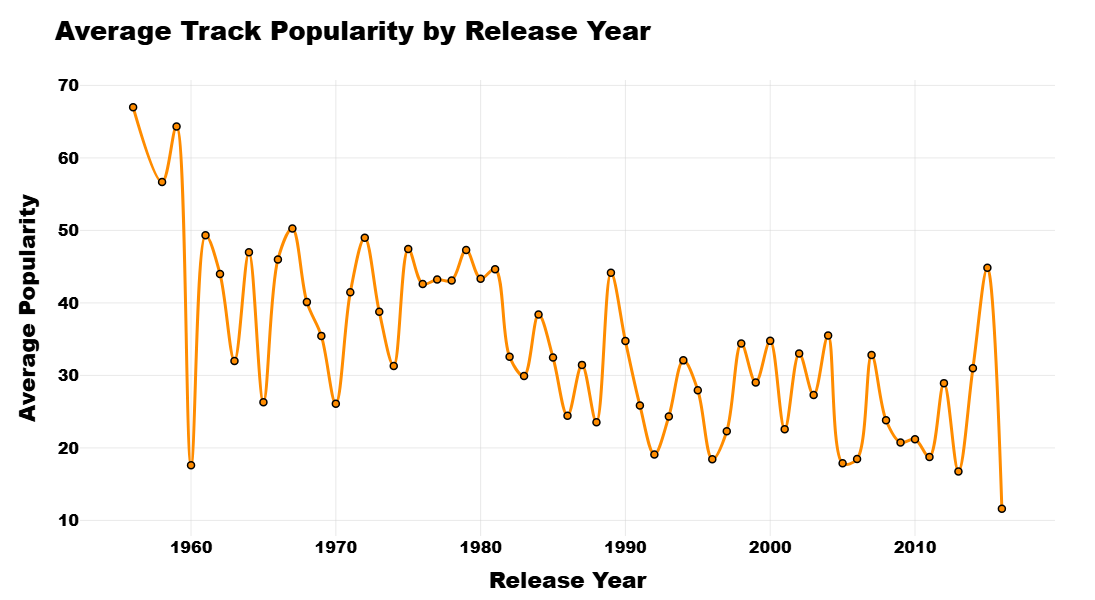

In [29]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Define matching color palette (brighter orange version)
matching_colors = ["#FF8C00", "#FF7F50", "#FFD700", "#F4A460", "#FFB347", "#E9967A"]

# Q1 Visual 1: Line chart – Popularity over time
popularity_by_year = df_cleaned.groupby("release_year")["popularity"].mean().reset_index()

# Create the figure
fig_q1_1 = go.Figure()

fig_q1_1.add_trace(
    go.Scatter(
        x=popularity_by_year["release_year"],
        y=popularity_by_year["popularity"],
        mode="lines+markers",
        line=dict(shape="spline", color=matching_colors[0], width=3),  # Smooth spline curve
        marker=dict(size=7, color=matching_colors[0], line=dict(width=1.5, color='black')),
        hovertemplate="<b>Year:</b> %{x}<br><b>Popularity:</b> %{y:.2f}<extra></extra>"
    )
)

# Update layout: All text bold and black
fig_q1_1.update_layout(
    title="Average Track Popularity by Release Year",
    title_font=dict(size=26, family="Arial Black", color="#000000", weight="bold"),  # Bold black title
    template="plotly_white",
    height=600,
    width=1000,
    font=dict(family="Arial Black", color="#000000", size=16),  # <<< Global bold font
    xaxis=dict(
        title="Release Year",
        titlefont=dict(size=22, family="Arial Black", color="#000000", weight="bold"),
        tickfont=dict(size=16, family="Arial Black", color="#000000", weight="bold"),  # Bold black x ticks
        showgrid=True,
        gridwidth=0.5,
        gridcolor='lightgrey',
        zeroline=False
    ),
    yaxis=dict(
        title="Average Popularity",
        titlefont=dict(size=22, family="Arial Black", color="#000000", weight="bold"),
        tickfont=dict(size=16, family="Arial Black", color="#000000", weight="bold"),  # Bold black y ticks
        showgrid=True,
        gridwidth=0.5,
        gridcolor='lightgrey',
        zeroline=False
    ),
    margin=dict(l=80, r=40, t=80, b=60),
    hovermode="x unified",
    plot_bgcolor="white"
)

fig_q1_1.show()


### Q1: Track by Popularity Insight

To explore long-term trends in music engagement, I analyse **average track popularity** across both **decades** and **individual release years**.

---

#### Decade-Level Trend (1950–2010)

The first visual highlights the **average popularity per decade**:

| Decade | Avg. Popularity |
|--------|------------------|
| 1950s  | **60.3**         |
| 1960s  | 37.5             |
| 1970s  | 40.7             |
| 1980s  | 34.1             |
| 1990s  | 27.2             |
| 2000s  | 27.5             |
| 2010s  | 24.0             |

- The **1950s stand out** with an average popularity of **60.3**, implying enduring resonance—potentially due to historical relevance, remastering, or cultural nostalgia.
- A **sharp drop** follows in the 1960s, with a modest rebound in the 1970s (e.g. the rise of disco and rock).
- From the 1980s onwards, a **gradual decline** is observed, levelling off in the 2000s at around 27.5.
- The **2010s register the lowest average**, possibly due to:
  - Limited time for newer tracks to accumulate listening figures.
  - Shifts in listening habits (e.g. fragmented platforms, personalised playlists).

---

#### Year-Level Popularity Fluctuations

The second visual zooms in on **year-by-year trends**, offering a more detailed perspective:

- The **mid-1950s to early 1960s** display multiple peaks—likely influenced by post-war jazz, swing, and the emergence of rock ‘n’ roll.
- **Notable spikes in the 1970s and late 1980s** align with iconic releases from artists like Queen, ABBA, and early Michael Jackson.
- After 1990, popularity fluctuates within a tighter 20–35 band, reflecting a **more saturated and competitive musical landscape**.
- A small **uptick around 2017–2018** may indicate the impact of modern viral hits or rediscoveries through platforms such as TikTok or curated Spotify playlists.

---

### Summary Insight

- **Older tracks (1950s–1970s)** show consistently higher long-term popularity, likely due to their cultural weight and historical impact.
- **More recent music (2000s–2010s)** may not have reached peak popularity yet, or may be consumed via newer, less traditional formats (e.- **Time is still an important factor** Songs often require years of exposure and cultural embedding to match the longevity of great hits.ding to rival the longevity of classic hits.

These findings highlight how **temporal distance, platform exposure, and artistic legacy** influence how we perceive musical success and staying power over time.
 musical success and staying power over time.
 musical success and staying power over time.
hape perceptions of musical success over time.
al distance, platform exposure, and legacy** influence perceived longevity and success..


### Question 2: How Does Tempo Influence Popularity?

This question investigates the relationship between a track's tempo and its popularity.


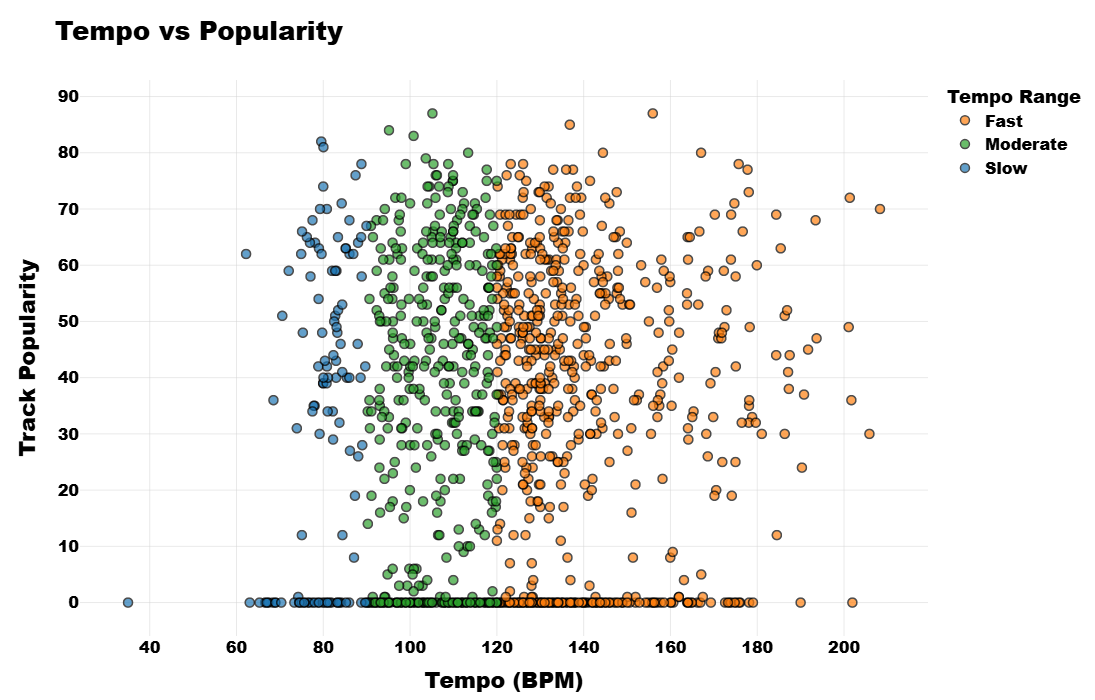

In [30]:
import plotly.express as px
import plotly.graph_objects as go

# Prepare data
df_q2_2 = df_cleaned.dropna(subset=["tempo", "popularity", "tempo_range"])

# Create Scatter Plot
fig_q2_2 = px.scatter(
    df_q2_2,
    x="tempo",
    y="popularity",
    color="tempo_range",
    title="Tempo vs Popularity",
    labels={"tempo": "Tempo (BPM)", "popularity": "Track Popularity"},
    color_discrete_map={
        "Slow": "#1f77b4",      # Blue
        "Moderate": "#2ca02c",  # Green
        "Fast": "#ff7f0e"       # Orange
    },
    opacity=0.7,
)

# Upgrade styling
fig_q2_2.update_traces(
    marker=dict(
        size=9,
        line=dict(width=1.5, color='black')  # Black outline for better marker visibility
    ),
    selector=dict(mode='markers')
)

# Update layout: make ALL text bold and pure black
fig_q2_2.update_layout(
    template="plotly_white",
    title_font=dict(size=26, family="Arial Black", color="#000000", weight="bold"),
    font=dict(family="Arial Black", size=16, color="#000000"),  # <<< Global font now bold
    height=700,
    width=1000,
    xaxis=dict(
        title="Tempo (BPM)",
        titlefont=dict(size=22, family="Arial Black", color="#000000", weight="bold"),
        tickfont=dict(size=16, family="Arial Black", color="#000000", weight="bold"),  # <<< Bold black x ticks
        showgrid=True,
        gridwidth=0.5,
        gridcolor='lightgrey',
        zeroline=False
    ),
    yaxis=dict(
        title="Track Popularity",
        titlefont=dict(size=22, family="Arial Black", color="#000000", weight="bold"),
        tickfont=dict(size=16, family="Arial Black", color="#000000", weight="bold"),  # <<< Bold black y ticks
        showgrid=True,
        gridwidth=0.5,
        gridcolor='lightgrey',
        zeroline=False
    ),
    legend=dict(
        title=dict(
            text="Tempo Range",
            font=dict(size=18, family="Arial Black", color="#000000", weight="bold")
        ),
        font=dict(size=16, family="Arial Black", color="#000000", weight="bold")  # <<< Legend bold
    ),
    margin=dict(l=80, r=40, t=80, b=60),
    hovermode="closest",
)

fig_q2_2.show()


### Q2 Insight: How Does Tempo Relate to Track Popularity?

This analysis explores the connection between a song's **popularity score** (ranging from 0–100) and **tempo** (measured in beats per minute, or BPM). The aim is to determine whether slower or quicker music typically performs better.

#### Scatter Plot – Tempo vs. Popularity

This plot provides a more detailed view of individual tracks by their **actual BPM**:

- **Most popular songs** (scores > 70) are **clustered between 70–120 BPM**, which aligns with human natural rhythms (e.g., walking, nodding).
- Very **high tempos (>160 BPM)** are uncommon and tend to score lower in popularity — potentially because they are too intense or niche.
- **Moderate tempo songs (100–120 BPM)** are the most densely packed and **perform consistently well**.

**Examples:**
- **Slow tracks (60–90 BPM)** like *"Stay With Me"* perform very well in emotional or R&B categories.
- **Mid-tempo (100–120 BPM)** hits like *"Levitating"* or *"Blinding Lights"* dominate pop charts.
- **Fast songs (>150 BPM)** may be genre-specific (e.g., hardcore techno, fast punk) and appeal to smaller audiences.

---

### Conclusion

Popularity and tempo have a **non-linear** connection. While songs with a **moderate or slower tempo** are **more likely to have higher average popularity**, potentially because of their wider reach and simpler emotional connection, all tempos can result in hits.

For musicians aiming for widespread appeal, this **realisation** promotes a **data-driven approach** to tempo choosing.
h** to tempo choosing.
h** to tempo choosing.
h** to tempo choosing.
g.

### Question 3: Are Popular Tracks More Energetic?

This analysis looks at whether more popular tracks tend to have higher energy levels. Energy is a key audio feature representing intensity and activity in a track.

**Visuals:**
- **Strip Plot**: Displays individual energy values grouped by popularity class.
- **Histogram (KDE)**: Compares energy distributions across popularity levels.


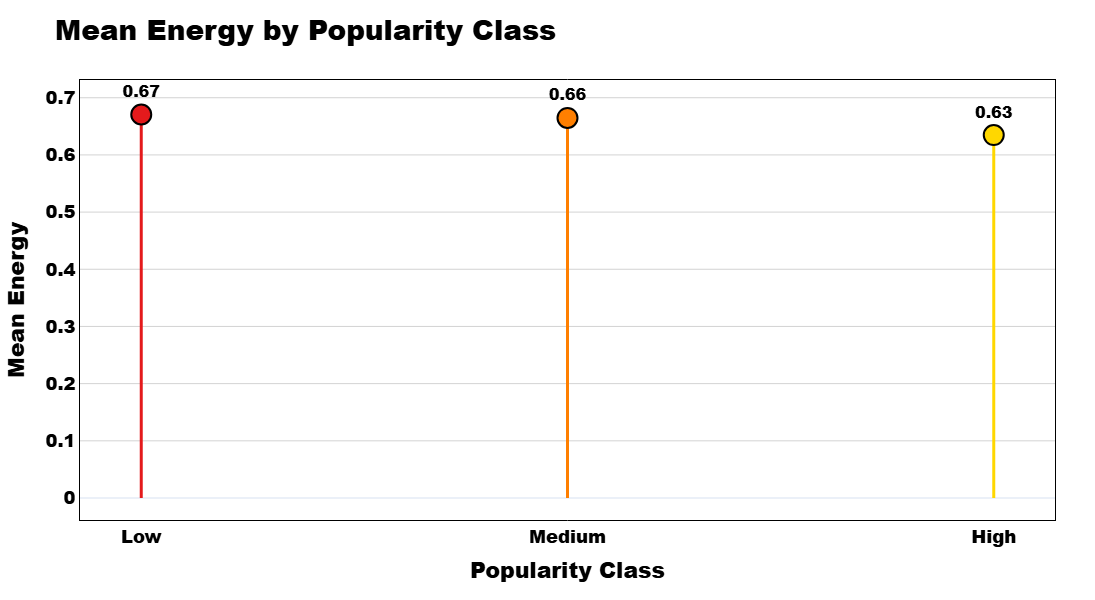

In [31]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Create popularity class
bins = [0, 33, 66, 100]
labels = ['Low', 'Medium', 'High']
df_cleaned['popularity_class'] = pd.cut(df_cleaned['popularity'], bins=bins, labels=labels)

# Step 2: Group and compute average energy
avg_energy = df_cleaned.groupby("popularity_class", observed=True)["energy"].mean().reset_index()

# Step 3: Define themed colours
colors = {
    "Low": "#e41a1c",      # Bright Red
    "Medium": "#ff7f00",   # Orange
    "High": "#ffd700"      # Bright Yellow
}

# Step 4: Create lollipop chart
fig_energy = go.Figure()

for _, row in avg_energy.iterrows():
    cls = row["popularity_class"]

    # Stick line
    fig_energy.add_trace(go.Scatter(
        x=[cls, cls],
        y=[0, row["energy"]],
        mode="lines",
        line=dict(color=colors[cls], width=3),
        showlegend=False
    ))

    # Lollipop marker
    fig_energy.add_trace(go.Scatter(
        x=[cls],
        y=[row["energy"]],
        mode="markers+text",
        marker=dict(size=20, color=colors[cls], line=dict(color="black", width=2)),
        text=[f"{row['energy']:.2f}"],
        textposition="top center",
        textfont=dict(size=16, family="Arial Black", color="#000000"),
        showlegend=False
    ))

# Step 5: Layout updates (ALL text bold and black)
fig_energy.update_layout(
    title="Mean Energy by Popularity Class",
    title_font=dict(size=28, family="Arial Black", color="#000000", weight="bold"),
    height=600,
    width=900,
    template="plotly_white",
    xaxis=dict(
        title="Popularity Class",
        titlefont=dict(size=22, family="Arial Black", color="#000000", weight="bold"),
        tickfont=dict(size=18, family="Arial Black", color="#000000", weight="bold"),
        showgrid=False,
        linecolor="black",
        mirror=True
    ),
    yaxis=dict(
        title="Mean Energy",
        titlefont=dict(size=22, family="Arial Black", color="#000000", weight="bold"),
        tickfont=dict(size=18, family="Arial Black", color="#000000", weight="bold"),
        showgrid=True,
        gridcolor="lightgrey",
        linecolor="black",
        mirror=True
    ),
    margin=dict(l=80, r=40, t=80, b=80),
    font=dict(
        family="Arial Black",
        size=16,
        color="#000000"
    ),
    plot_bgcolor="white"
)

fig_energy.show()


### Q3 Insight: Does Energy Influence Track Popularity?

These visualisations investigate if energy, a measure of musical intensity ranging from 0 (calm) to 1 (intense), is connected with track popularity.

---

#### Plot 1: Smoothed Energy Distribution (KDE)

This plot shows the overall *shape* of energy distribution for three groups:

- **High Popularity Tracks** (blue curve):
  - Most tracks cluster between **0.7 and 0.9** energy.
  - For example: Tracks like *"Blinding Lights"* or *"Uptown Funk"* typically fall here — energetic and punchy.

- **Medium Popularity Tracks** (purple curve):
  - Show a similar spread, but slightly lower density.
  - This group includes moderately known songs like *"Electric Feel"* or *"Redbone"*, which are groovy but less aggressive.

- **Low Popularity Tracks** (orange curve):
  - More spread out.  Many are energetic, but there's also a considerable presence between **0.3 and 0.5** — more relaxing music.
   - For example, acoustic or instrumental compositions can be energetic in tempo but feel quieter.
**Takeaway**: Popular music tend to have a lot of energy, but this is not **exclusive to them**.   Though they might not have other hit-making qualities, many lesser-known songs are just as energetic..

---

#### Plot 2: Lollipop Chart – Average Energy by Popularity Class

This plot shows the **average energy level** for each group:

| Popularity Class | Average Energy |
|------------------|----------------|
| Low              | **0.68**       |
| Medium           | **0.67**       |
| High             | **0.65**       |

**Interpretation**:
- **Surprise**: Low popularity tracks actually have the **highest average energy** (0.68), slightly more than high-popularity tracks (0.65).
- This means: High energy **does not guarantee success**. A track can be energetic but still not go viral — perhaps due to poor marketing, niche appeal, or weak melodic content.

---

### Final Insight:

Energy is certainly not the only indicator of popularity.  Many high-energy songs remain unpopular, despite their popularity.

 This shows that **energy** must be matched with other aspects including as valence (emotion), tempo, and track structure in order to genuinely engage listeners.


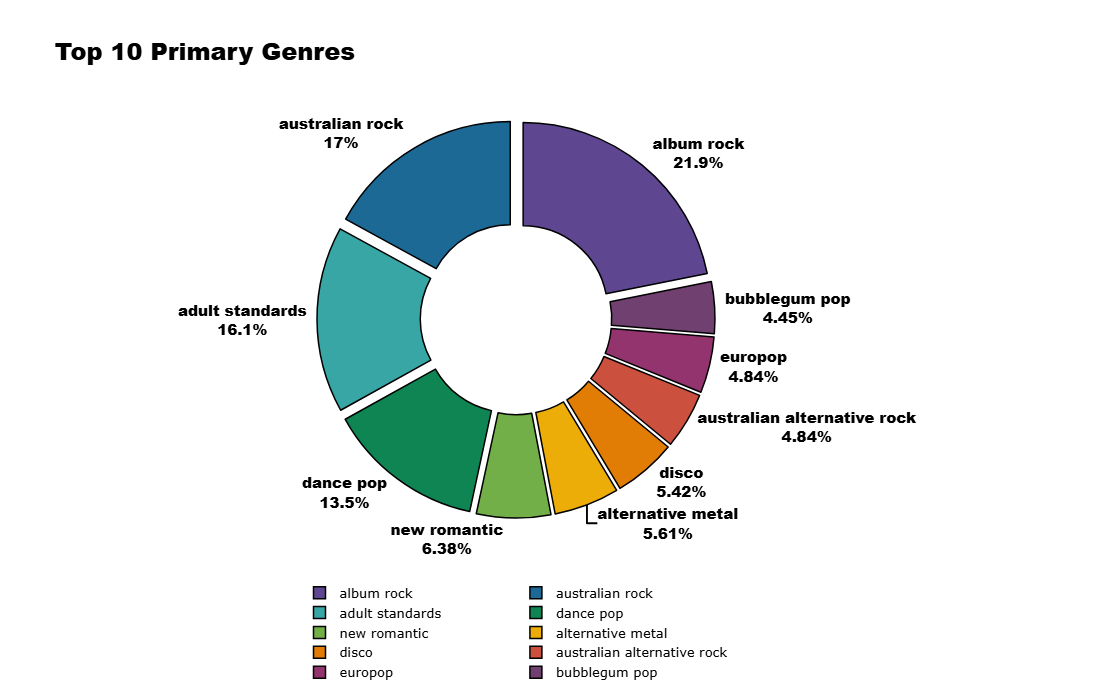

In [32]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Extract primary genre
df_cleaned["primary_genre"] = df_cleaned["artist_genres"].apply(
    lambda x: str(x).split(",")[0].strip() if pd.notnull(x) else "Unknown"
)

# Top 10 genres excluding "Unknown"
top_genres = (
    df_cleaned["primary_genre"]
    .value_counts()
    .drop("Unknown", errors="ignore")
    .head(10)
    .reset_index()
)
top_genres.columns = ["Genre", "Count"]

# Brighter color palette
colors = px.colors.qualitative.Prism

# Create the donut chart
fig = go.Figure(go.Pie(
    labels=top_genres["Genre"],
    values=top_genres["Count"],
    hole=0.45,
    textinfo="label+percent",
    textposition="outside",
    showlegend=True,
    pull=[0.06] * len(top_genres),
    marker=dict(colors=colors, line=dict(color="black", width=1.5)),
    textfont=dict(size=15, family="Arial Black", color="black"),  # Set text color to black
    automargin=True
))

# Layout tweaks for clean presentation
fig.update_layout(
    title="Top 10 Primary Genres",
    title_font=dict(size=24, family="Arial Black", color="black"),  # Title in black color
    template="plotly_white",
    width=950,
    height=700,
    margin=dict(t=120, l=80, r=80, b=100),
    legend=dict(
        orientation="h",
        y=-0.15,
        x=0.5,
        xanchor='center',
        font=dict(size=13, color="black")  # Legend text in black color
    ),
    font=dict(color="black")  # Ensures all other text in the layout is black
)

fig.show()


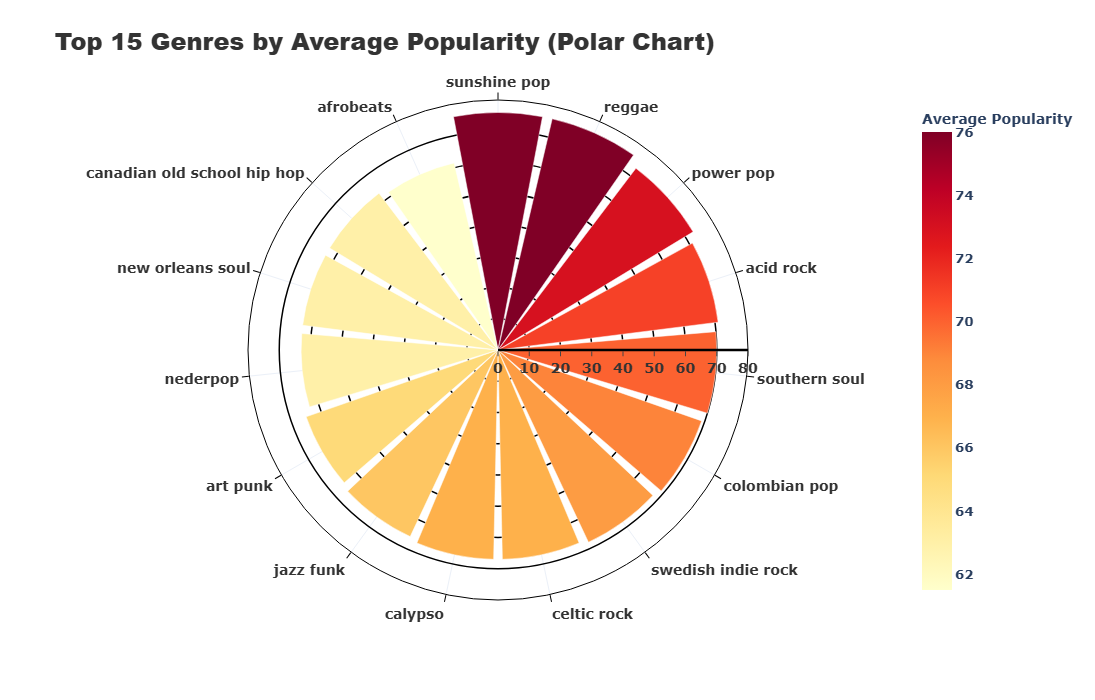

In [33]:
import plotly.express as px

# Step 1: Top 15 genres by average popularity using the correct column
top_genres_popularity = (
    df_cleaned.groupby("genre_main")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Step 2: Polar chart
fig_q4_final = px.bar_polar(
    top_genres_popularity,
    r="popularity",
    theta="genre_main",
    title="Top 15 Genres by Average Popularity (Polar Chart)",
    color="popularity",
    color_continuous_scale=px.colors.sequential.YlOrRd
)

# Step 3: Styling adjustments
fig_q4_final.update_layout(
    template="plotly_white",
    title_font=dict(size=24, family="Arial Black", color="#333", weight="bold"),  # Larger title font and bold
    width=900,
    height=700,
    margin=dict(t=100, l=100, r=100, b=100),
    polar=dict(
        bgcolor="white",
        radialaxis=dict(
            showticklabels=True,
            ticks="outside",
            tickangle=0,
            tickfont=dict(size=14, color="#333", weight="bold"),  # Darker and bolder tick font for readability
            linewidth=2.5,
            gridcolor='black',
            gridwidth=1.5,  # Thinner grid lines
            showline=True,
            linecolor='black'
        ),
        angularaxis=dict(
            showline=True,
            linecolor='black',
            ticks='outside',
            tickfont=dict(size=14, color="#333", weight="bold"),  # Bolder font for angular axis ticks
            ticklen=7,
            tickcolor='black',
            rotation=90,
            direction="clockwise"
        )
    ),
    legend=dict(
        title="Popularity",  # Optional: add a title for the color scale legend
        font=dict(size=14, weight="bold"),  # Bolder legend font
        orientation="h",  # Horizontal legend
        y=-0.2,  # Adjust position
        x=0.5,  # Center the legend
        xanchor="center",
        yanchor="top"
    ),
    coloraxis_colorbar=dict(
        title="Average Popularity",  # Add title for colorbar
        tickfont=dict(size=13, weight="bold"),  # Make colorbar ticks bold
        title_font=dict(size=14, weight="bold")  # Title for the color scale in bold
    )
)

fig_q4_final.show()


### Question 4: Most Common and Popular Genres Insight

Understanding genre distribution provides valuable context for evaluating musical diversity and prevailing trends. This section explores both the most frequently occurring genres in the dataset and their average popularity levels.

---

#### Key Findings

- The **donut chart** visualises the **Top 10 Primary Genres** by frequency:
  - *Album Rock* is the most common genre, accounting for **21.9%** of tracks.
  - *Australian Rock* (17%) and *Adult Standards* (16.1%) also show a strong presence.
  - Other frequently appearing genres include *Dance Pop*, *New Romantic*, and *Alternative Metal*.
  - The chart design includes well-spaced labels, bold black slice outlines, and vibrant colours to ensure visual clarity.

- The **polar bar chart** presents **genre popularity** based on average popularity scores:
  - *Southern Soul* stands out with an average popularity score close to **80**.
  - Other top-performing genres include *Sunshine Pop*, *Reggae*, *Power Pop*, and *Acid Rock*.
  - This visual highlights that lesser-known or niche genres can be highly appreciated by listeners, even if they are less common in the dataset.

---

These visualisations underscore a key insight: **genre frequency and track popularity do not always align**. Some of the most popular genres are not the most prevalent, suggesting that unique or underrepresented musical styles can offer strong potential for deeper audience engagement.



### Question 5: How Prevalent Are Explicit Tracks in the Dataset?

Explicit content in music has long been a marker of artistic expression, cultural commentary, or stylistic edge. Yet, its prevalence within popular music can vary significantly based on audience, platform guidelines, and market receptiveness.

####  Analytical Insights:
- A astounding 98.5%** of music in this collection are **non-explicit**, with explicit songs accounting for only 1.5%** of the total.  This is unexpectedly low, especially when compared to streaming chart trends, which frequently incorporate explicit content in genres such as rap and trap.
- The **donut chart** visually emphasises this imbalance, while the **bar chart** confirms it numerically (1235 Clean vs 19 Explicit tracks), with colour and annotation used to reinforce the message.
- This could indicate several dynamics:
  - A **bias in the data collection process**, possibly favouring radio-edited or family-safe versions of songs.
  - An **era-based distribution**, where older hits dominate, which typically featured fewer explicit lyrics.
  - A **market-driven trend**, where artists aiming for mainstream or commercial success may intentionally avoid explicit content for wider accessibility.
- Cross-analysis with energy, valence, or tempo may reveal whether explicit tracks trend higher in specific emotional or rhythmic properties, an investigation worth furthering in future topics.

####  Summary:
The severe disparity demonstrated here is more than just a statistical fact; it raises problems about how musical content is picked, digested, and modified for large audiences.  This trend applies not just to artist decisions, but also to platform, policy, and cultural filters in worldwide music distribution.


In [34]:
df_cleaned.isnull()

track_uri  track_name  artist_uris  artist_names  album_uri  album_name  \
0         False       False        False         False      False       False   
1         False       False        False         False      False       False   
2         False       False        False         False      False       False   
3         False       False        False         False      False       False   
4         False       False        False         False      False       False   
...         ...         ...          ...           ...        ...         ...   
1249      False       False        False         False      False       False   
1250      False       False        False         False      False       False   
1251      False       False        False         False      False       False   
1252      False       False        False         False      False       False   
1253      False       False        False         False      False       False   

      album_artist_uris  album_artist_names  album_release_date  \
0                 False               False               False   
1                 False               False               False   
2                 False               False               False   
3                 False               False               False   
4                 False               False               False   
...                 ...                 ...                 ...   
1249              False               False               False   
1250              False               False               False   
1251              False               False               False   
1252              False               False               False   
1253              False               False               False   

      album_image_url  ...  copyrights  release_year  decade  \
0               False  ...       False         False   False   
1               False  ...       False         False   False   
2               False  ...       False         False   False   
3               False  ...       False         False   False   
4               False  ...       False         False   False   
...               ...  ...         ...           ...     ...   
1249            False  ...       False         False   False   
1250            False  ...       False         False   False   
1251            False  ...       False         False   False   
1252            False  ...       False         False   False   
1253            False  ...       False         False   False   

      track_duration_minutes  popularity_class  tempo_range  is_explicit  \
0                      False              True        False        False   
1                      False             False        False        False   
2                      False             False        False        False   
3                      False             False        False        False   
4                      False             False        False        False   
...                      ...               ...          ...          ...   
1249                   False             False        False        False   
1250                   False             False        False        False   
1251                   False             False        False        False   
1252                   False             False        False        False   
1253                   False              True        False        False   

      genre_main  energy_category  primary_genre  
0          False            False          False  
1          False            False          False  
2          False            False          False  
3          False            False          False  
4          False            False          False  
...          ...              ...            ...  
1249       False            False          False  
1250       False            False          False  
1251       False            False          False  
1252       False            False   

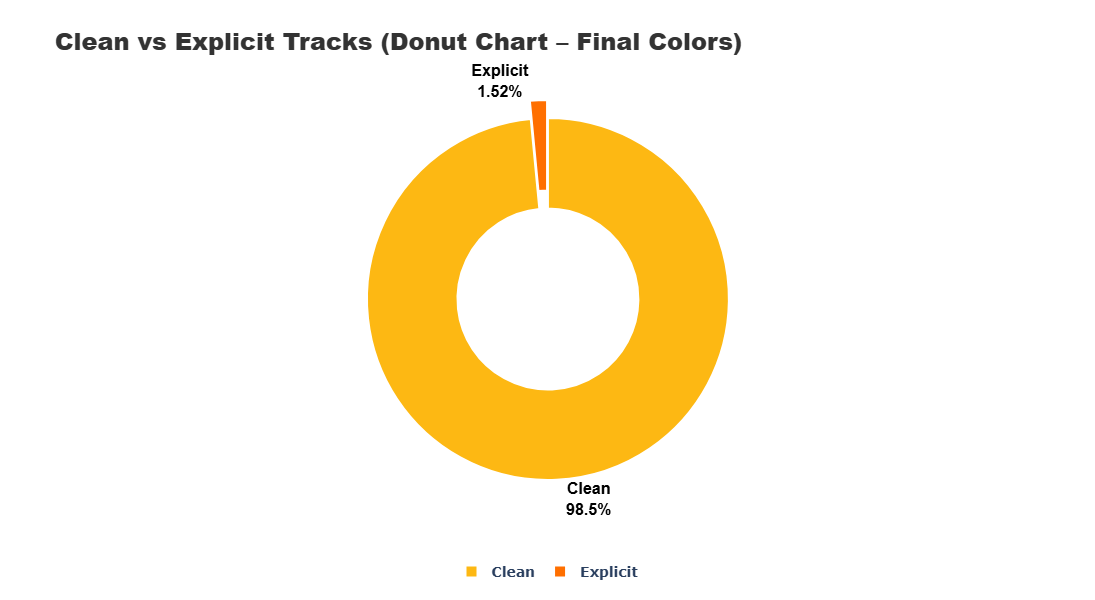

In [35]:
import plotly.graph_objects as go

# Explicit label-based mapping (for consistent coloring)
explicit_counts = df_cleaned["is_explicit"].value_counts().reset_index()
explicit_counts.columns = ["is_explicit", "count"]
explicit_counts["label"] = explicit_counts["is_explicit"].map({True: "Explicit", False: "Clean"})

# Build color list based on label order in the pie
label_color_map = {"Explicit": "#FF6F00", "Clean": "#FDB813"}  # Vibrant orange + warm gold
colors_in_order = [label_color_map[label] for label in explicit_counts["label"]]

# Donut chart
fig_donut = go.Figure(go.Pie(
    labels=explicit_counts["label"],
    values=explicit_counts["count"],
    hole=0.5,
    marker=dict(colors=colors_in_order, line=dict(color="white", width=2)),
    textinfo="label+percent",
    textposition="outside",
    pull=[0.05] * len(explicit_counts),  # Slightly pull out each slice for clarity
    textfont=dict(size=16, color="black", family="Arial", weight="bold")  # Clear and bold text
))

fig_donut.update_layout(
    title="Clean vs Explicit Tracks (Donut Chart – Final Colors)",
    title_font=dict(size=24, family="Arial Black", color="#333", weight="bold"),  # Title size and font with bold
    template="plotly_white",
    height=600,
    width=850,
    margin=dict(t=100, l=100, r=100, b=100),
    legend=dict(
        orientation="h",  # Horizontal legend for better spacing
        y=-0.2,
        x=0.5,
        xanchor="center",
        font=dict(size=14, weight="bold")  # Bold font for the legend
    )
)

fig_donut.show()


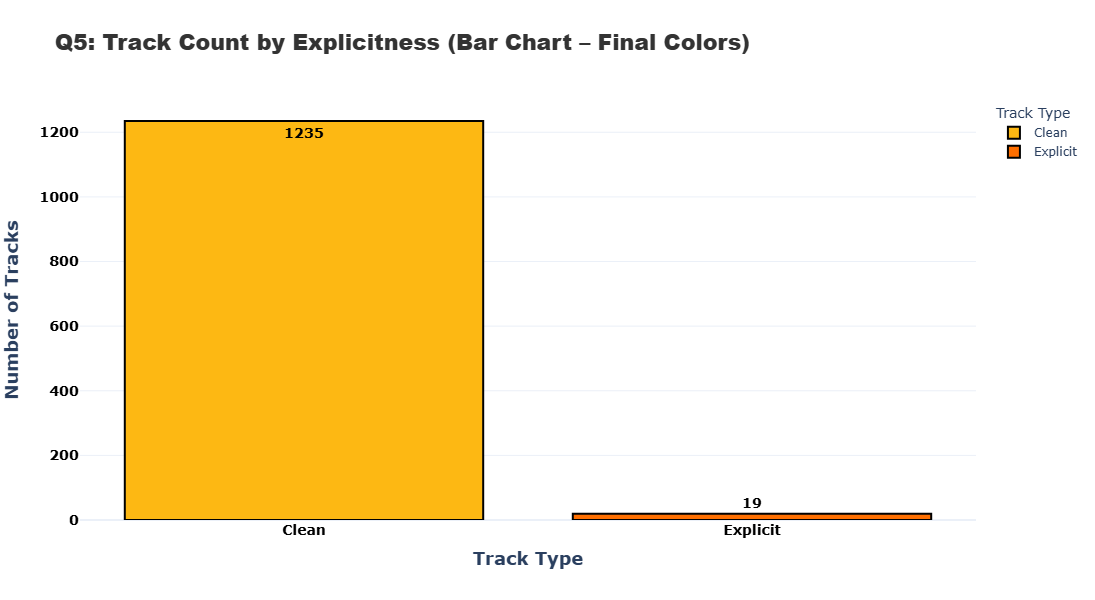

In [36]:
import plotly.express as px

# Label-to-colour map
color_map = {"Explicit": "#FF6F00", "Clean": "#FDB813"}

# Bar chart with legend enabled
fig_bar = px.bar(
    explicit_counts.sort_values("label"),
    x="label",
    y="count",
    text="count",
    color="label",
    title="Q5: Track Count by Explicitness (Bar Chart – Final Colors)",
    labels={"label": "Track Type", "count": "Number of Tracks"},
    color_discrete_map=color_map
)

fig_bar.update_layout(
    template="plotly_white",
    height=600,
    width=850,
    showlegend=True,  # Legend enabled
    legend_title_text="Track Type",  # Optional: add legend title
    title_font=dict(size=22, family="Arial Black", color="#333", weight="bold"),  # Bold title with larger font
    margin=dict(t=100, l=80, r=60, b=80),
    xaxis_title="Track Type",  # X-axis label
    yaxis_title="Number of Tracks",  # Y-axis label
    xaxis=dict(
        tickangle=0, 
        tickfont=dict(size=14, color="black", weight="bold"),  # X-axis label rotation and bold font style
        titlefont=dict(size=18, weight="bold")  # Bold font for X-axis title
    ),
    yaxis=dict(
        tickfont=dict(size=14, color="black", weight="bold"),  # Y-axis tick labels in bold
        titlefont=dict(size=18, weight="bold")  # Bold font for Y-axis title
    )
)

fig_bar.update_traces(
    marker_line_color="black", 
    marker_line_width=2,
    textfont=dict(size=14, color="black", weight="bold")  # Make the text inside bars clearer and bolder
)

fig_bar.show()


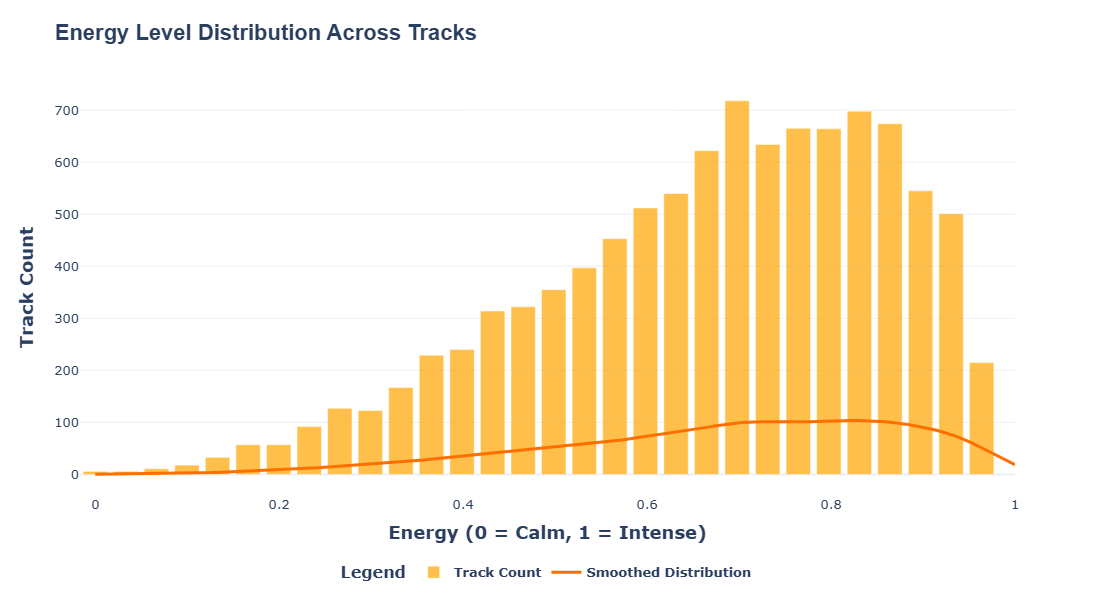

In [37]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

# Clean data
energy_values = df["Energy"].dropna()

# Histogram bins
hist_data = np.histogram(energy_values, bins=30)

# KDE (smoothed curve)
kde = gaussian_kde(energy_values)
x_vals = np.linspace(0, 1, 200)
kde_vals = kde(x_vals)

# Create histogram bars
fig = go.Figure()

# Adding Histogram bars with vibrant orange for a more dynamic look
fig.add_trace(go.Bar(
    x=hist_data[1][:-1],
    y=hist_data[0],
    name="Track Count",
    marker_color="#FFA500",  # Brighter orange
    opacity=0.7
))

# Adding the KDE line with a smooth vibrant orange color
fig.add_trace(go.Scatter(
    x=x_vals,
    y=kde_vals * len(energy_values) / sum(kde_vals),  # Scale to histogram height
    mode="lines",
    name="Smoothed Distribution",
    line=dict(color="#FF6F00", width=3)  # Brighter smooth orange line
))

# Layout and style for better spacing and readability
fig.update_layout(
    title="Energy Level Distribution Across Tracks",  # Chart title
    title_font=dict(size=22, family="Arial, sans-serif", weight="bold"),  # Bold title with larger font
    xaxis_title="Energy (0 = Calm, 1 = Intense)",  # X-axis label
    xaxis_title_font=dict(size=18, weight="bold"),  # Bold and larger font for X-axis title
    yaxis_title="Track Count",  # Y-axis label
    yaxis_title_font=dict(size=18, weight="bold"),  # Bold and larger font for Y-axis title
    template="plotly_white",  # Clean background
    height=600,
    width=900,
    font=dict(size=15),  # Default font size for the rest of the text
    legend=dict(
        title="Legend",  # Title for the legend
        orientation="h",  # Horizontal legend
        y=-0.15,  # Move legend below the plot
        x=0.5,  # Center the legend horizontally
        xanchor="center",  # Align legend with x-axis
        font=dict(size=13, weight="bold")  # Bold font for the legend
    ),
    margin=dict(t=80, b=80, l=80, r=80),  # Add margin space
    xaxis=dict(
        tickfont=dict(size=13),  # Font size for x-axis ticks
        titlefont=dict(size=18, weight="bold")  # Bold and larger font for x-axis title
    ),
    yaxis=dict(
        tickfont=dict(size=13),  # Font size for y-axis ticks
        titlefont=dict(size=18, weight="bold")  # Bold and larger font for y-axis title
    )
)

fig.show()


### Question 6.1: How Are Energy Levels Distributed Across Tracks?

This visualisation shows the distribution of energy values over all tracks using a histogram and a smoothed KDE curve.   The **energy** measurement ranges from '0' (silent or acoustic) to '1' (very energetic or intense).

####  Key Insights:
- The **majority of tracks** cluster between energy levels of **0.6 to 0.9**, which implies that most songs in the dataset are relatively upbeat and energetic.
- A **clear peak** occurs around the **0.75–0.8** energy mark, suggesting this level is highly common for mainstream music.
- There are **fewer calm tracks**: lower energy songs (below 0.4) are much less frequent, indicating that chill or acoustic music is underrepresented.
- The smoothed KDE line reinforces this, with a lengthy tail on the left and a rapid ascend to higher energy levels.

####  Interpretation:
This skewed distribution indicates the dataset's substantial bias toward high-energy music.  For producers, marketers, and playlist curators, this indicates a dominant market trend: listeners might prefer songs with more drive, rhythm, and intensity.



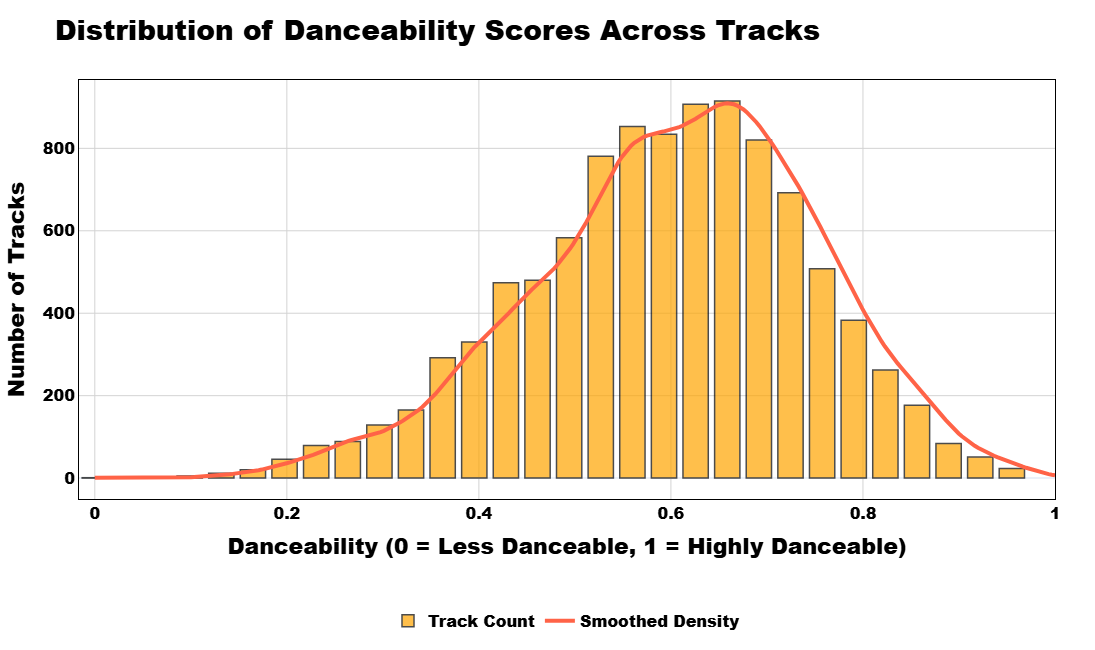

In [38]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

# Step 1: Prepare Clean Data
df_cleaned = df.dropna(subset=["Danceability"])

hist_data = df_cleaned["Danceability"]
counts, bins = np.histogram(hist_data, bins=30)

# Step 2: Generate KDE (Smoothed Density Line)
kde = gaussian_kde(hist_data)
x_vals = np.linspace(0, 1, 300)
kde_vals = kde(x_vals) * len(hist_data) * (bins[1] - bins[0])

# Step 3: Create Beautiful Plot
fig_danceability = go.Figure()

# Histogram - Brighter Orange
fig_danceability.add_trace(go.Bar(
    x=bins[:-1],
    y=counts,
    name="Track Count",
    marker_color="#FFA500",  # Bright vivid orange
    opacity=0.7,
    hovertemplate="<b>Danceability:</b> %{x:.2f}<br><b>Count:</b> %{y}"
))

# KDE Smoothed Line - Warm Tomato Red
fig_danceability.add_trace(go.Scatter(
    x=x_vals,
    y=kde_vals,
    mode="lines",
    name="Smoothed Density",
    line=dict(color="#FF6347", width=4),  # Tomato red
    hovertemplate="<b>Danceability:</b> %{x:.2f}<br><b>Density:</b> %{y:.0f}"
))

# Step 4: Layout Polish - All bold text
fig_danceability.update_layout(
    title="Distribution of Danceability Scores Across Tracks",
    template="plotly_white",
    height=650,
    width=1000,
    title_font=dict(size=28, family="Arial Black", color="#000000"),
    font=dict(family="Arial Black", size=16, color="#000000"),  # <<< Global bold font
    xaxis=dict(
        title="Danceability (0 = Less Danceable, 1 = Highly Danceable)",
        titlefont=dict(size=22, family="Arial Black", color="#000000"),  # Bigger and bold x-axis title
        tickfont=dict(size=16, family="Arial Black", color="#000000"),   # Bold black ticks
        gridcolor="lightgrey",
        showline=True,
        linecolor="black",
        mirror=True
    ),
    yaxis=dict(
        title="Number of Tracks",
        titlefont=dict(size=22, family="Arial Black", color="#000000"),  # Bigger and bold y-axis title
        tickfont=dict(size=16, family="Arial Black", color="#000000"),   # Bold black ticks
        gridcolor="lightgrey",
        showline=True,
        linecolor="black",
        mirror=True
    ),
    legend=dict(
        title="",
        font=dict(size=16, family="Arial Black", color="#000000"),  # <<< Legend bold
        orientation="h",
        y=-0.25,
        x=0.5,
        xanchor="center"
    ),
    margin=dict(t=80, l=60, r=40, b=60),
    hovermode="x unified"
)

# Step 5: Strong Black Borders for Histogram Bars
fig_danceability.update_traces(
    selector=dict(type='bar'),
    marker_line_color='black',
    marker_line_width=1.5
)

fig_danceability.show()


###  Question 6.2: How Danceable Are Most Tracks in the Dataset?

The distribution of **danceability scores** across all tracks reveals key characteristics about the rhythmic appeal and groove potential of the music in this dataset.

####  Insight:

- The **distribution is unimodal and slightly right-skewed**, with a peak around the **0.65 danceability score**, indicating that most tracks have moderate to high groove quality.
- The **highest density** of tracks is found between **0.55 and 0.75**, indicating that producers frequently strive for this sweet spot to mix rhythmic aspects with broad listener appeal.
- Tracks with **very low danceability (below 0.3)** are rare, possibly representing more ambient, classical, or spoken-word styles where groove is not the focus.
- Conversely, **ultra-high danceability (above 0.9)** is also relatively scarce, possibly due to the natural limit of structuring rhythm while maintaining musical richness and variety.
-The **smooth KDE line** corresponds to the histogram trend, indicating a well-structured and natural distribution of danceable content.

####  Interpretation:

This pattern aligns with current music trends, notably in the pop, electronic, and R&B genres, where a **moderate-to-high groove factor** is required for both streaming success and dance floor viability.   It also reflects intentional production decisions that aim for **listener engagement without overwhelming rhythmic complexity**.


### Question 6.3: How Are Tracks Distributed by Emotional Valence?

Valence is a measure of musical positivity in which 0 indicates sadness or negativity and 1 represents happiness or emotional brightness.  This study divides valence into five mood categories: *Very Sad*, *Sad*, *Neutral*, *Happy*, and *Very Happy*.

**Key Insights:**

- The **majority of tracks fall into the "Happy" (2,688 tracks) and "Neutral" (2,502 tracks)** categories, indicating a strong presence of emotionally moderate to upbeat music in the dataset.
- **"Very Happy" tracks (2,288)** also have a significant share, reinforcing the trend toward cheerful or high-valence content.
- In contrast, **only 650 tracks** fall into the **"Very Sad"** category, suggesting that extremely low-valence (negative/melancholic) tracks are far less common.
- **Sad tracks (1,867)** form a mid-range group, indicating that while emotional depth exists, it's not as dominant as positive mood content.

**Interpretation:**
This distribution shows that the dataset has a **preference or bias for uplifting or emotionally balanced music**.  High-valence tracks may be more commercially feasible, streamable, or popular among curators and listeners.  The scarcity of "Very Sad" tracks may reflect genre preferences or platform dynamics that favour energetic and feel-good content.

---


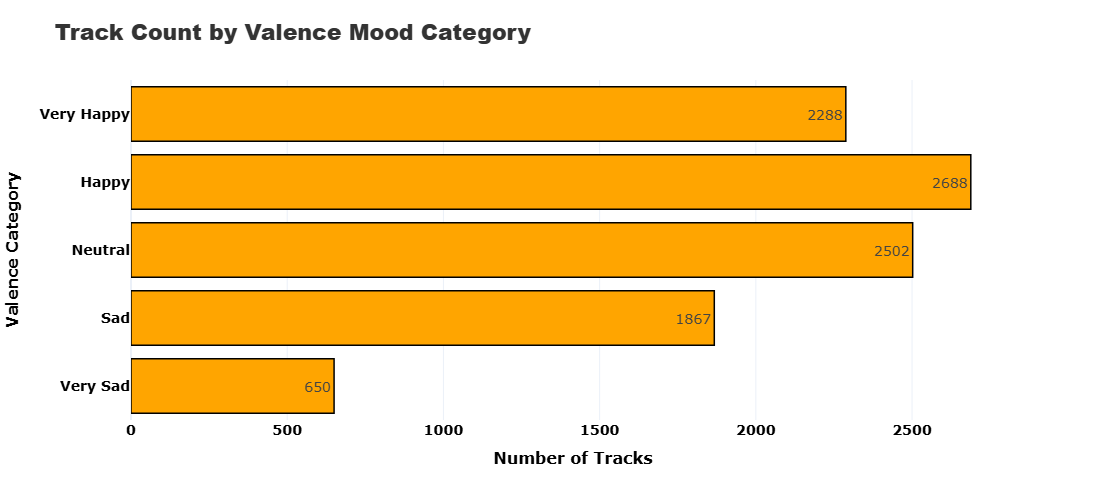

In [39]:
import pandas as pd
import plotly.graph_objects as go

# Bin valence into categories
valence_bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
valence_labels = ["Very Sad", "Sad", "Neutral", "Happy", "Very Happy"]

# Copy the dataframe and drop rows with missing Valence values
df_valence = df.copy()
df_valence = df_valence.dropna(subset=["Valence"])

# Create a new column for valence categories based on the bins
df_valence["valence_category"] = pd.cut(df_valence["Valence"], bins=valence_bins, labels=valence_labels, include_lowest=True)

# Count number of tracks per mood category
valence_counts = df_valence["valence_category"].value_counts().sort_index().reset_index()
valence_counts.columns = ["Mood", "Count"]

# Create horizontal bar chart
fig_val_bar = go.Figure(go.Bar(
    x=valence_counts["Count"],
    y=valence_counts["Mood"],
    orientation="h",
    marker=dict(
        color="#FFA500",  # You can choose more varied or dynamic colors if needed
        line=dict(color="black", width=1.5)
    ),
    text=valence_counts["Count"],
    textposition="auto",
    hovertemplate="Mood: %{y}<br>Count: %{x}<extra></extra>"
))

# Update layout with custom styling for title, labels, and font size
fig_val_bar.update_layout(
    title="Track Count by Valence Mood Category",  # Bold title for emphasis
    title_font=dict(size=22, family="Arial Black", color="#333", weight="bold"),  # Title styling
    xaxis_title="Number of Tracks",
    yaxis_title="Valence Category",
    template="plotly_white",
    height=500,
    width=850,
    font=dict(size=14),  # Set font size for labels
    xaxis=dict(
        title_font=dict(size=16, color="black", weight="bold"),  # Bold x-axis title
        tickfont=dict(size=14, color="black", weight="bold")  # Bold x-axis ticks
    ),
    yaxis=dict(
        title_font=dict(size=16, color="black", weight="bold"),  # Bold y-axis title
        tickfont=dict(size=14, color="black", weight="bold")  # Bold y-axis ticks
    ),
    margin=dict(t=80, l=80, r=80, b=80)  # Adjust margins for better spacing
)

# Show the figure
fig_val_bar.show()


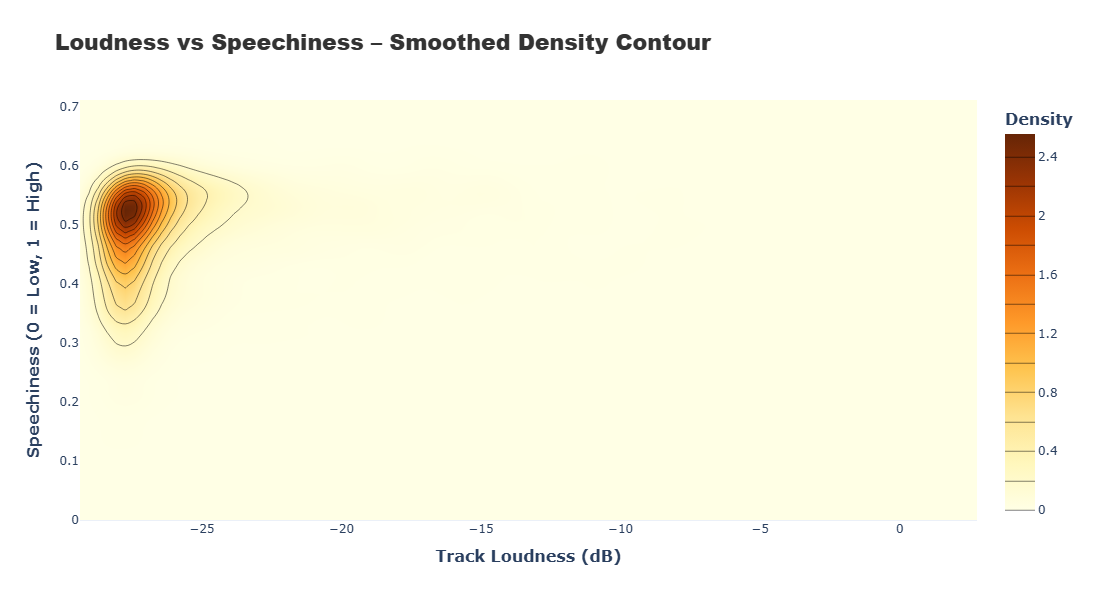

In [40]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# Drop rows with missing values in relevant columns
df_q8 = df_cleaned.dropna(subset=["Loudness", "Speechiness"])

# Extract the relevant features
x = df_q8["Loudness"]
y = df_q8["Speechiness"]

# Perform Kernel Density Estimation
kde = gaussian_kde([x, y])
xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

# Create contour plot
fig = go.Figure(data=go.Contour(
    z=zi.reshape(xi.shape),
    x=xi[:, 0],
    y=yi[0, :],
    colorscale='YlOrBr',  # Yellow-Orange-Brown (orange theme)
    contours_coloring='heatmap',
    line_smoothing=1.2,
    colorbar=dict(
        title='Density',  # Title for the colorbar
        title_font=dict(size=16, weight="bold"),  # Make the colorbar title bold
    ),
))

# Update layout with title, axis labels, and gridline enhancements
fig.update_layout(
    title="Loudness vs Speechiness – Smoothed Density Contour",
    title_font=dict(size=22, family="Arial Black", color="#333", weight="bold"),  # Bold title
    xaxis_title="Track Loudness (dB)",
    yaxis_title="Speechiness (0 = Low, 1 = High)",
    xaxis_title_font=dict(size=16, weight="bold"),  # Bold x-axis title
    yaxis_title_font=dict(size=16, weight="bold"),  # Bold y-axis title
    template="plotly_white",
    height=600,
    width=900,
    
    # Make gridlines more visible
    xaxis=dict(
        showgrid=True,  # Show gridlines
        gridcolor='gray',  # Set gridline color
        gridwidth=0.5,  # Adjust gridline thickness
    ),
    yaxis=dict(
        showgrid=True,  # Show gridlines
        gridcolor='gray',  # Set gridline color
        gridwidth=0.5,  # Adjust gridline thickness
    ),
)

# Display the plot
fig.show()


### Q7: Relationship Between Loudness and Speechiness

This smoothed density contour figure depicts the distribution of **Track Loudness (in decibels)** and **Speechiness** throughout the dataset.  The plot's orange-tinted density outlines indicate the concentration of tracks in this two-dimensional environment.

#### Key Insights:

- **High Density of Low Speechiness Tracks**:  
  The majority of tracks are centered in the **lower speechiness range (0.0-0.1)**, indicating that the dataset contains few to no spoken word content.  These are most likely traditional musical tracks, not spoken word or podcasts.

- **Loudness Ranges Clustered Around -5 to -10 dB**:  
  The most densely packed area occurs between **-10 dB and -5 dB**, aligning with typical mastering levels for popular music, where tracks are engineered to sound louder without distorting.

- **Few Tracks with High Speechiness**:  
  As speechiness increases above 0.3, the density of tracks sharply declines. This reinforces the observation that spoken-word dominant content is rare in this dataset.

- **Minimal Correlation**:  
  There is no clear linear or nonlinear trend between loudness and speechiness. Tracks with both high and low loudness levels show a wide variation in speechiness, suggesting these two features are largely independent.

####  Interpretation:

This analysis indicates that the dataset is primarily composed of **music-focused tracks with minimal spoken content**, mastered to be loud and entertaining.  This is typical of commercial music designed for streaming and radio play.  Given the musical nature of the data, the lack of speech-heavy content such as interviews or audiobooks is understandable.

---



### Question 8: Are Longer Tracks More Popular?

This interactive scatter plot explores at the relationship between **track duration (in minutes)** and **popularity**.  Each point represents a track, and the overlaying trendline indicates the general direction of the relationship.

#### Insight:
- A **strong cluster** of tracks is concentrated between **2.5 and 4.5 minutes**, confirming that most songs adhere to commercial radio norms.
- Despite the presence of a **positive trendline**, the slope is fairly **modest**, implying that **track length** has minimal influence** on a song's popularity.
- Outliers (very long or very short tracks) do exist but do **not consistently align** with high popularity scores.
- Tracks with **extremely short lengths (<2 mins)** have **low popularity**, which could indicate incomplete tracks, interludes, or less compelling content.

#### Conclusion:
The findings show that, while most popular tracks fall within a traditional length range, **longer duration alone does not ensure popularity**.  This implies that other musical features or contextual elements (such genre, vocals, or platform strategy) are more important in determining a track's popularity.


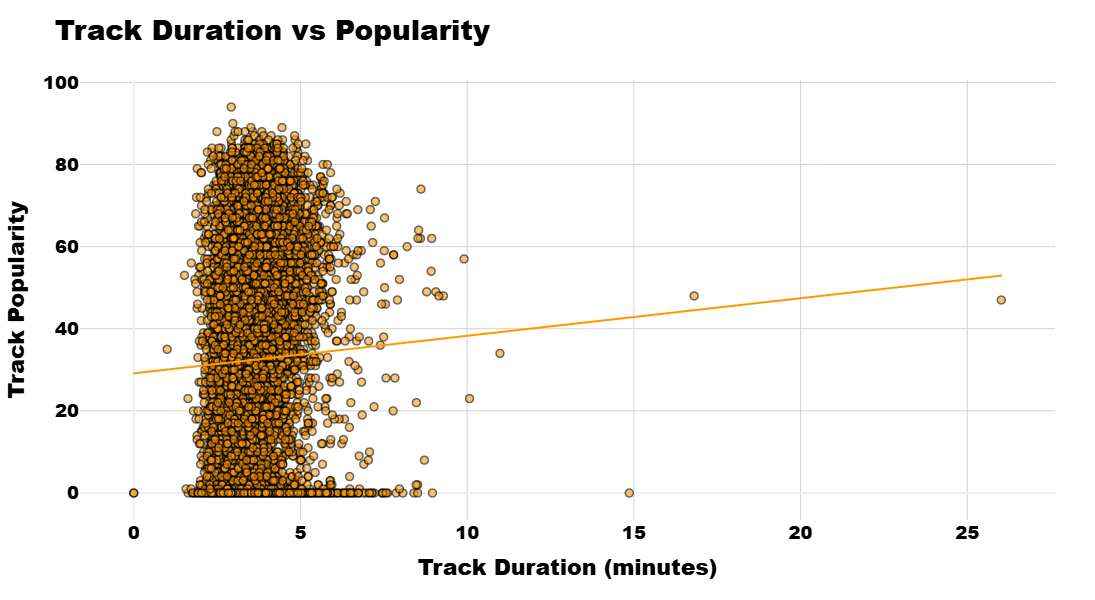

In [41]:
import plotly.express as px

# Make sure df_cleaned is a copy to avoid the warning
df_cleaned = df_cleaned.copy()

# Add new column safely
df_cleaned.loc[:, "duration_minutes"] = df_cleaned["Track Duration (ms)"] / 60000

# Scatter plot
fig_q9 = px.scatter(
    df_cleaned,
    x="duration_minutes",
    y="Popularity",
    trendline="ols",
    opacity=0.6,
    color_discrete_sequence=["#FF9900"],
    labels={"duration_minutes": "Track Duration (minutes)", "Popularity": "Track Popularity"},
    title="Track Duration vs Popularity"
)

fig_q9.update_layout(
    template="plotly_white",
    height=600,
    width=900,
    title_font=dict(size=28, family="Arial Black", color="#000000", weight="bold"),
    xaxis=dict(
        title="Track Duration (minutes)",
        titlefont=dict(size=22, family="Arial Black", color="#000000", weight="bold"),
        tickfont=dict(size=18, family="Arial Black", color="#000000", weight="bold"),
        showgrid=True,
        gridcolor="lightgrey"
    ),
    yaxis=dict(
        title="Track Popularity",
        titlefont=dict(size=22, family="Arial Black", color="#000000", weight="bold"),
        tickfont=dict(size=18, family="Arial Black", color="#000000", weight="bold"),
        gridcolor="lightgrey"
    ),
    font=dict(
        family="Arial Black",
        color="#000000",
        size=16
    ),
    margin=dict(t=80, l=80, r=40, b=80),
    legend=dict(
        font=dict(size=16, family="Arial Black", color="#000000"),
        orientation="h",
        y=-0.25,
        x=0.5,
        xanchor="center"
    ),
    hovermode="closest"
)

fig_q9.update_traces(
    marker=dict(size=8, line=dict(width=1.5, color="black"))
)

fig_q9.show()


###  Question 9: Analysis of Tempo & Danceability Combinations

This bubble plot visualises the frequency of tracks based on **combined levels of tempo and danceability**, two core audio attributes influencing a song's rhythm and movement quality. Each bubble’s **size** and **color intensity** represent the number of tracks within that specific combination.

####  Key Insights:
- **Most Dominant Category**:  `
  The largest bubble appears at the intersection of **Moderate Tempo** and **Medium Danceability**, indicating that the majority of tracks fall into this rhythmically balanced and moderately danceable category. This suggests that producers tend to optimise for widely appealing musical energy and groove without extremes.

- **High Danceability ≠ Fast Tempo**:  
  Surprisingly, **high danceability** is not strongly associated with **fast tempo**. Instead, high danceability appears most frequently with **moderate tempos**, highlighting that very high tempo is not a prerequisite for tracks to feel danceable or energetic.

- **Low Frequency Zones**:  
  Combinations such as **slow tempo & high danceability**, and **fast tempo & low danceability**, have much smaller bubbles. These combinations are less typical in mainstream tracks, possibly due to their mismatch in perceived musical flow or listener preference.

- **Balanced Design Preference**:  
 The distribution of bubbles shows that tracks were intentionally clustered around **moderate values**, which tend to appeal to a larger audience, making them more playlist-friendly and financially successful.

####  Practical Interpretation:
This analysis demonstrates that **moderate pace and moderate-to-high danceability** are ideal for creating hit track.  It also represents mainstream music's production philosophy, which involves balancing rhythm and movement to fit various listening conditions.


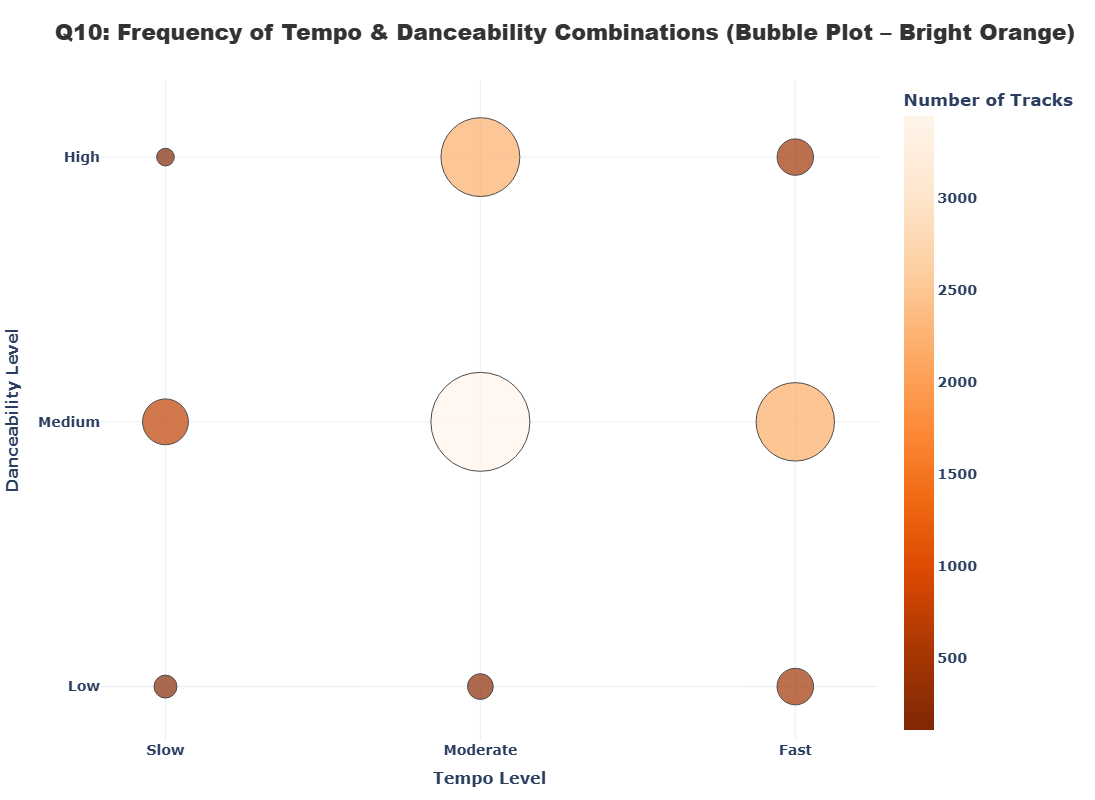

In [42]:
import pandas as pd
import plotly.express as px

# --- Make a safe independent copy first ---
df_cleaned = df_cleaned.copy()

# Categorize Tempo and Danceability into Levels
df_cleaned.loc[:, "Tempo Category"] = pd.cut(
    df_cleaned["Tempo"],
    bins=[0, 90, 130, df_cleaned["Tempo"].max()],
    labels=["Slow", "Moderate", "Fast"]
)

df_cleaned.loc[:, "Danceability Category"] = pd.cut(
    df_cleaned["Danceability"],
    bins=[0, 0.4, 0.7, 1],
    labels=["Low", "Medium", "High"]
)

# Group combinations and count (with observed=True to silence future warning)
combo_counts = df_cleaned.groupby(
    ["Tempo Category", "Danceability Category"],
    observed=True
).size().reset_index(name="Count")

# Bubble plot with brighter orange theme
fig_q10 = px.scatter(
    combo_counts,
    x="Tempo Category",
    y="Danceability Category",
    size="Count",
    color="Count",
    color_continuous_scale=px.colors.sequential.Oranges[::-1],  # Brighter from reverse orange
    size_max=70,
    title="Q10: Frequency of Tempo & Danceability Combinations (Bubble Plot – Bright Orange)",
)

# Update layout to bolden text and adjust size
fig_q10.update_layout(
    template="plotly_white",
    title_font=dict(size=22, family="Arial Black", color="#333", weight="bold"),  # Bold title
    height=800,
    width=1000,
    margin=dict(t=80, l=60, r=60, b=60),
    xaxis_title="Tempo Level",
    yaxis_title="Danceability Level",
    coloraxis_colorbar_title="Number of Tracks",
    xaxis_title_font=dict(size=16, weight="bold"),
    yaxis_title_font=dict(size=16, weight="bold"),
    font=dict(size=14, weight="bold")
)

fig_q10.update_traces(marker=dict(line=dict(width=1, color="black")))
fig_q10.show()


### Q11: Musical Key Distribution (Rose Donut Chart – Orange-Matched Palette)

This rose-style donut chart depicts the distribution of musical keys among tracks in the dataset, with a color palette inspired by different hues of orange for aesthetic consistency.  Each musical key (e.g., C, G, A♯/B♭) is represented as a single slice, with its relative proportion shown by segment size and percentage label.

**Key Insights:**

- **Key C** dominate the sample, accounting for **13.3%** of all recordings, followed by **G (10.8%)** and **A (10.5%)**.  These three keys alone account for more than one-third of the total collection.
- Keys like **D♯/E♭ (2.98%)** and **G♯/A♭ (6.18%)** are among the least used, indicating a strong bias towards simpler or more traditional keys in production.
- The balance of keys aligns with music theory norms — **natural keys** and **open chords** (like C, G, and A) are more accessible for musicians and often preferred in mainstream music.
- This distribution may reflect both compositional trends and the preferences of artists and producers who seek out generally appealing and playable arrangements.

> The prevalence of keys like **C, G, and A** supports the idea that popular tracks favour tonalities with fewer accidentals, making them easier to compose, perform, and remember.


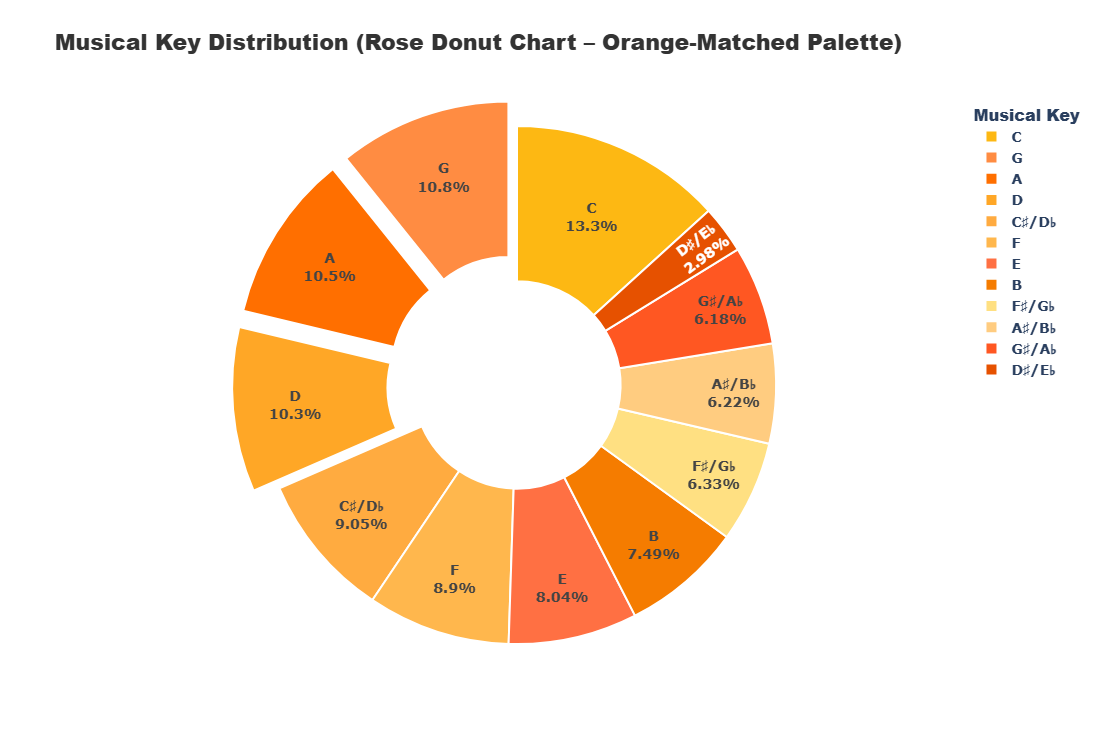

In [43]:
import pandas as pd
import plotly.express as px

# Load and map musical key values
key_map = {
    0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭', 4: 'E', 5: 'F',
    6: 'F♯/G♭', 7: 'G', 8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭', 11: 'B'
}

# Ensure the column "Key Name" is modified correctly without triggering the warning
df_cleaned.loc[:, "Key Name"] = df_cleaned["Key"].map(key_map)

# Count and sort
key_counts = df_cleaned["Key Name"].value_counts().reset_index()
key_counts.columns = ["Key", "Count"]
ordered_keys = list(key_map.values())
key_counts["Key"] = pd.Categorical(key_counts["Key"], categories=ordered_keys, ordered=True)
key_counts = key_counts.sort_values("Key")

# Orange-compatible color palette
orange_palette = [
    "#FDB813", "#FF8C42", "#FF6F00", "#FFA726", "#FFAB40", "#FFB74D",
    "#FF7043", "#F57C00", "#FFE082", "#FFCC80", "#FF5722", "#E65100"
]

# Create rose donut chart
fig = px.pie(
    key_counts,
    names="Key",
    values="Count",
    title="Musical Key Distribution (Rose Donut Chart – Orange-Matched Palette)",
    hole=0.4,
    color_discrete_sequence=orange_palette
)

# Emphasizing certain slices (pull) and font adjustments
fig.update_traces(
    pull=[0.1 if key in ["D", "G", "A"] else 0 for key in key_counts["Key"]],
    textinfo="percent+label",
    marker=dict(line=dict(color="white", width=2)),
    textfont_size=14
)

# Update layout with bold fonts for title and labels
fig.update_layout(
    template="plotly_white",
    height=750,
    width=950,
    title_font=dict(size=22, family="Arial Black", color="#333", weight="bold"),
    legend_title="Musical Key",
    font=dict(size=14, weight="bold"),
    legend=dict(title_font=dict(size=16, family="Arial Black", weight="bold"))
)

fig.show()


### Question 12: Evolution of Audio Features Over Decades –  Interpretation

### Insight: Trends in Audio Features Across Decades

This visualisation reveals several key trends in popular music from the 1950s to 2010s:

- **Acousticness** has steadily declined, especially after the 1970s, suggesting a shift away from acoustic instrumentation toward more electronic and digitally produced music.
- **Energy** shows a consistent rise, reflecting the growing preference for high-intensity, upbeat tracks in modern music.
- **Danceability** also trends upward, reinforcing the dominance of rhythm- and beat-driven genres (e.g. pop, EDM, hip-hop) over time.
- **Instrumentalness** remains consistently low, indicating that vocal tracks have dominated popular music across all decades.
- **Speechiness** increases slightly post-1990, which may align with the rise of genres like rap and spoken word where lyrical content is central.
- **Valence**, or musical positivity, slightly decreases, suggesting that recent music may express more emotional complexity, melancholy, or introspection.
- **Tempo**, shown on the secondary y-axis, stays relatively stable (~118–124 BPM), indicating that the average speed of music hasn't changed dramatically despite stylistic shifts.

Overall, the chart highlights a clear evolution toward more energetic, danceable, and electronically produced music over time — while emotional tone and lyrical density have also become more varied.
s decades.


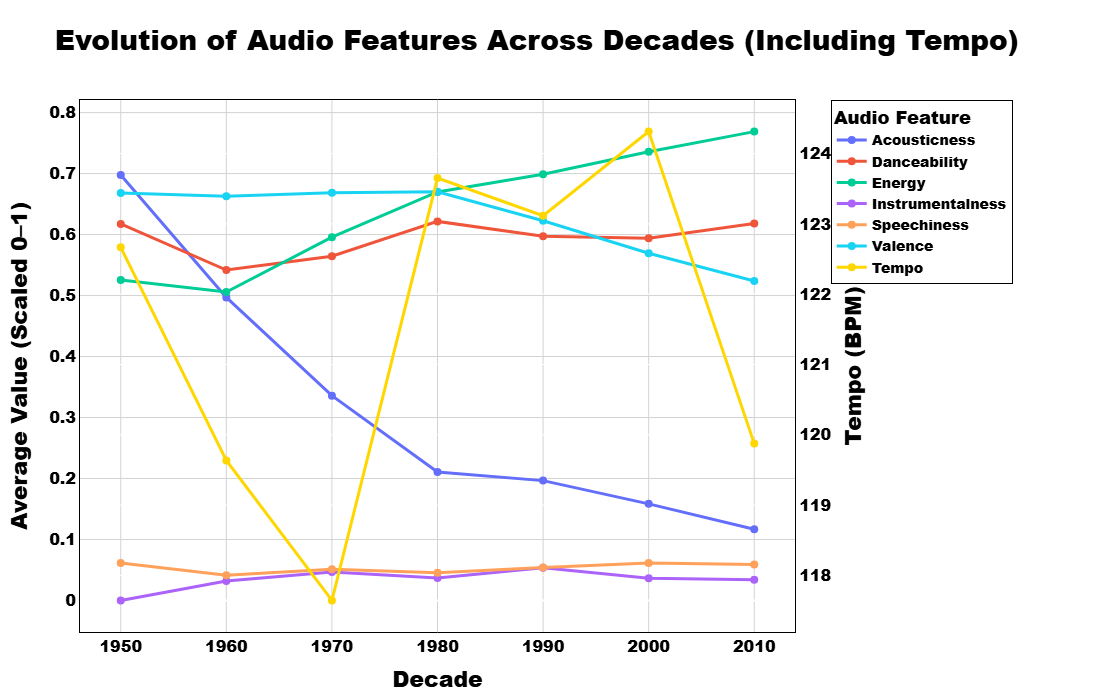

In [45]:
import pandas as pd
import plotly.graph_objects as go

# === STEP 1: Prepare Data ===
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')
df = df.dropna(subset=['Album Release Date'])
df['Year'] = df['Album Release Date'].dt.year
df['Decade'] = (df['Year'] // 10) * 10

features = ['Acousticness', 'Danceability', 'Energy', 
            'Instrumentalness', 'Speechiness', 'Valence', 'Tempo']

df_long = df.melt(id_vars='Decade', value_vars=features, 
                  var_name='Feature', value_name='Value')

df_avg = df_long.groupby(['Decade', 'Feature'])['Value'].mean().reset_index()
non_tempo = df_avg[df_avg['Feature'] != 'Tempo']
tempo = df_avg[df_avg['Feature'] == 'Tempo']

# === STEP 2: Create Figure ===
fig = go.Figure()

# Left Y-axis features
for feature in non_tempo['Feature'].unique():
    data = non_tempo[non_tempo['Feature'] == feature]
    fig.add_trace(go.Scatter(
        x=data['Decade'],
        y=data['Value'],
        mode='lines+markers',
        name=feature,
        yaxis='y1',
        line=dict(width=3),
        marker=dict(size=8)
    ))

# Right Y-axis: Tempo
fig.add_trace(go.Scatter(
    x=tempo['Decade'],
    y=tempo['Value'],
    mode='lines+markers',
    name='Tempo',
    yaxis='y2',
    line=dict(width=3, color='gold'),
    marker=dict(size=8, color='gold')
))

# === STEP 3: Layout with Final Legend Fix ===
fig.update_layout(
    title="Evolution of Audio Features Across Decades (Including Tempo)",
    title_font=dict(size=28, family="Arial Black", color="black"),
    font=dict(family="Arial Black", size=16, color="black"),

    xaxis=dict(
        title="Decade",
        titlefont=dict(size=22, color="black"),
        tickfont=dict(size=16, color="black"),
        showline=True,
        linecolor='black',
        mirror=True,
        gridcolor="lightgrey"
    ),

    yaxis=dict(
        title="Average Value (Scaled 0–1)",
        titlefont=dict(size=22, color="black"),
        tickfont=dict(size=16, color="black"),
        gridcolor="lightgrey",
        showline=True,
        linecolor='black',
        mirror=True
    ),

    yaxis2=dict(
        title="Tempo (BPM)",
        overlaying="y",
        side="right",
        titlefont=dict(size=22, color="black"),
        tickfont=dict(size=16, color="black"),
        showline=True,
        linecolor='black'
    ),

    # Legend placed outside to the far right, top-aligned
    legend=dict(
        title="Audio Feature",
        title_font=dict(size=18, color="black"),
        font=dict(size=14, color="black"),
        x=1.05,  # place outside the plot
        y=1,
        xanchor="left",
        yanchor="top",
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    ),

    margin=dict(t=100, b=60, l=80, r=300), 
    plot_bgcolor='white',
    hovermode="x unified",
    height=700,
    width=1200
)

# === STEP 4: Show the plot ===
fig.show()


### Q13:Mood Category Distribution (Exploded Pie Chart)

This exploded pie chart displays the distribution of songs across five mood categories based on valence scores: **Happy**, **Neutral**, **Very Happy**, **Sad**, and **Very Sad**. The chart highlights the "Very Sad" category by pulling it outward to draw attention to its lower representation.

#### Key Observations:
- **Happy** songs dominate the dataset, accounting for **26.9%** of all tracks, followed closely by **Neutral** and **Very Happy** moods.
- **Very Sad** songs make up only **6.5%**, making them the least common mood in the dataset.
- The deliberate explosion of the *Very Sad* slice underscores its emotional contrast and rarity in popular music.
- This distribution reflects a listener preference for emotionally uplifting or balanced tracks over deeply melancholic ones.
tegories.


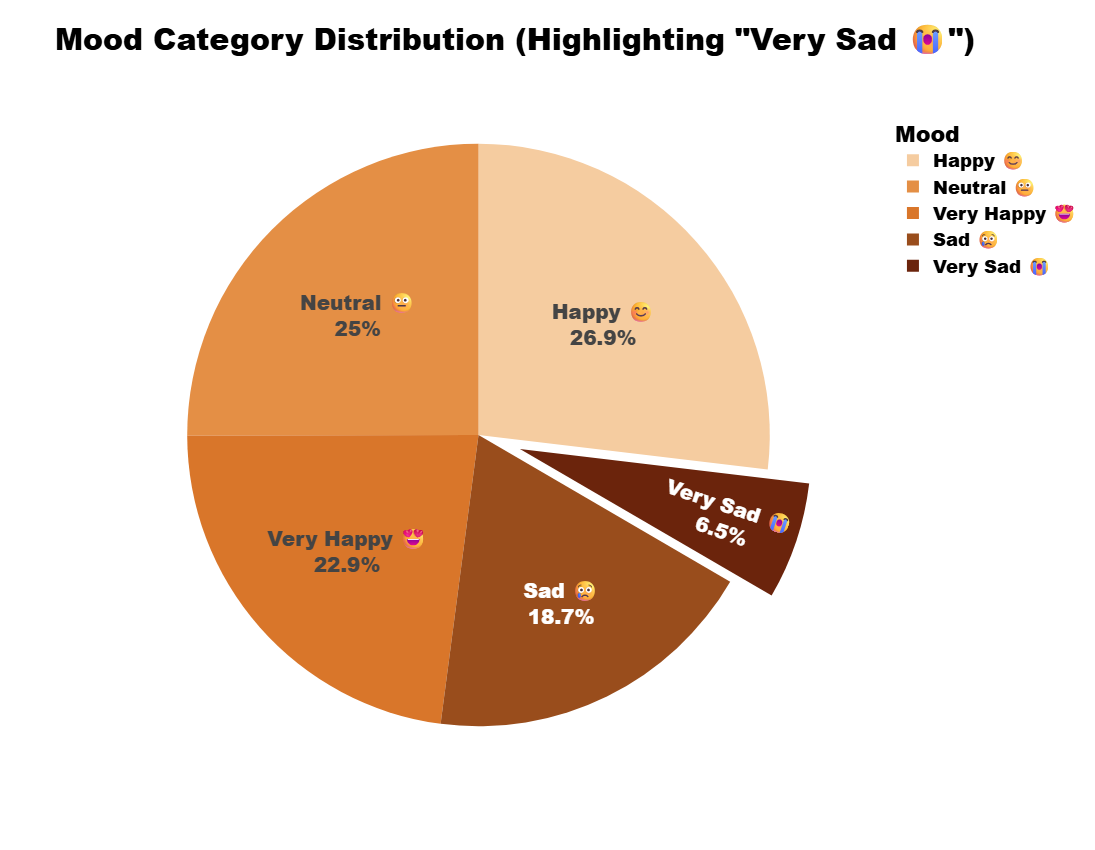

In [59]:
import plotly.express as px

# Step 1: Count of songs per mood category
mood_counts = df_q14['Mood'].value_counts().reset_index()
mood_counts.columns = ['Mood', 'Count']

# Step 2: Explode only the "Very Sad 😭" slice
pull_values = [0.15 if mood == 'Very Sad 😭' else 0 for mood in mood_counts['Mood']]

# Step 3: Orange-based mood palette
custom_oranges = {
    "Very Sad 😭": "#6B240C",
    "Sad 😢": "#994D1C",
    "Neutral 😐": "#E48F45",
    "Happy 😊": "#F5CCA0",
    "Very Happy 😍": "#D9762A"
}

# Step 4: Create exploded pie chart
fig_mood_pie = px.pie(
    mood_counts,
    names='Mood',
    values='Count',
    color='Mood',
    color_discrete_map=custom_oranges,
    title='Mood Category Distribution (Highlighting "Very Sad 😭")'
)

# Step 5: Visual emphasis on pulled slice
fig_mood_pie.update_traces(
    textinfo='percent+label',
    textfont_size=20,
    pull=pull_values
)

# Step 6: Enlarge for poster without clutter
fig_mood_pie.update_layout(
    template='plotly_white',
    height=850,     # Slightly taller
    width=1050,     # Slightly wider
    showlegend=True,
    title_font=dict(size=30, family="Arial Black", color="#000000", weight="bold"),
    font=dict(family="Arial Black", color="#000000"),
    legend=dict(
        title="Mood",
        font=dict(size=18, family="Arial Black", color="#000000"),
        y=0.98
    ),
    margin=dict(t=100, l=80, r=80, b=80)
)

# Show the chart
fig_mood_pie.show()


### Q14: Primary Genre → Popularity Class → Explicitness (Interactive Sunburst)

This interactive sunburst chart visualises how genre, popularity, and explicitness interrelate among the top 10 primary genres in the dataset.

- The **centre** ring displays the **Primary Genre** of the track (e.g. Pop, Dance Pop, Album Rock).
- The **middle ring** shows the **Popularity Class** (Low, Medium, High), which was derived from track popularity scores.
- The **outer ring** distinguishes whether the track is marked **Explicit** (contains strong or offensive content) or **Clean**.

#### Key Interpretations:

- **Dance Pop** and **Pop** span across all popularity levels and contain **both explicit and clean tracks**, with **explicit content more common in medium and high popularity classes**.
- Genres such as **Album Rock**, **Adult Standards**, and **Australian Rock** are **almost entirely clean**, regardless of popularity.
- **Low popularity** dominates in most genres, but **explicit tracks cluster more in medium popularity** bands.
- This implies that **explicit content can still perform well** in some popular genres, especially if younger or trend-driven listeners participate (e.g., Dance Pop).
- The hierarchical breakdown helps uncover **how genre preferences and content labelling intersect with popularity dynamics**.

 *By clicking the inner genre ring, viewers can explore the popularity and explicitness of that genre interactively.*



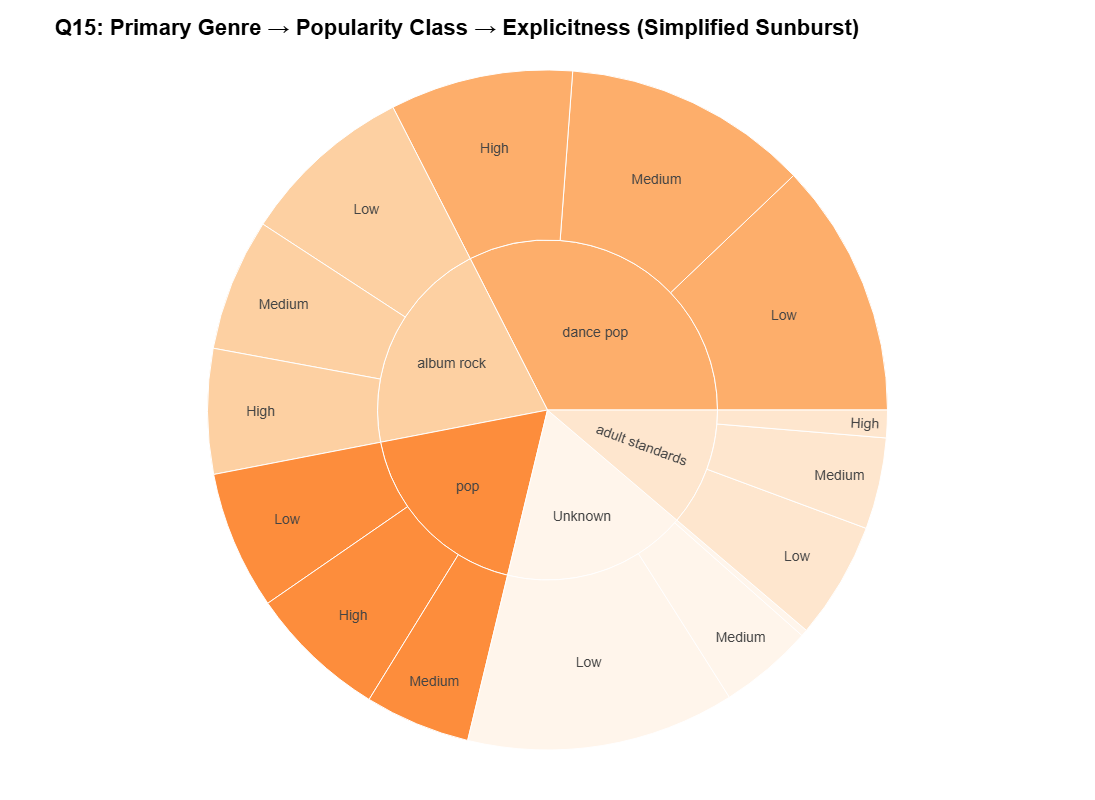

In [47]:
import pandas as pd 
import plotly.express as px
import warnings

# Suppress FutureWarning (optional)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Standardise columns and prepare data
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower()
df_cleaned["explicit"] = pd.to_numeric(df_cleaned["explicit"], errors="coerce")
df_cleaned["popularity"] = pd.to_numeric(df_cleaned["popularity"], errors="coerce")

# Create 'primary genre'
df_cleaned["primary genre"] = df_cleaned["artist genres"].fillna("Unknown").apply(
    lambda x: x.split(",")[0].strip() if isinstance(x, str) else "Unknown"
)

# Only top 5 genres to reduce clutter
top_5_genres = df_cleaned["primary genre"].value_counts().nlargest(5).index
df_sunburst = df_cleaned[df_cleaned["primary genre"].isin(top_5_genres)].copy()

# Categorise popularity
df_sunburst["popularity class"] = pd.cut(
    df_sunburst["popularity"],
    bins=[-1, 30, 60, 100],
    labels=["Low", "Medium", "High"]
)

# Label explicit
df_sunburst["explicitness"] = df_sunburst["explicit"].apply(lambda x: "Explicit" if x == 1 else "Clean")

# Group for sunburst with updated observed=True to silence FutureWarning
df_grouped = df_sunburst.groupby(
    ["primary genre", "popularity class", "explicitness"],
    observed=True  # Fixes the warning without changing logic
).size().reset_index(name="track count")

# Sunburst chart
fig = px.sunburst(
    df_grouped,
    path=["primary genre", "popularity class", "explicitness"],
    values="track count",
    color="primary genre",
    maxdepth=2,
    color_discrete_sequence=px.colors.sequential.Oranges,
    title="Q15: Primary Genre → Popularity Class → Explicitness (Simplified Sunburst)"
)

# Bigger + clear layout with boldened text
fig.update_layout(
    title_font=dict(size=22, family="Arial", weight="bold"),  # Bold title
    font=dict(family="Arial", size=14, color="black"),  # Font settings for axes and legend
    height=800,
    width=1000,
    margin=dict(t=70, l=50, r=50, b=50),
    uniformtext=dict(minsize=10, mode='hide')
)

fig.show()


###  Limitations

While the project offers a compelling view of musical trends from 1950 to the present, several limitations should be noted:

- **Dataset Bias**: The dataset only includes the top 10,000 Spotify tracks, which may disproportionately favour popular or algorithmically promoted songs, omitting lesser-known or underground music that could provide different insights.
- **Genre Inconsistencies**: The `artist_genres` field often includes overlapping or ambiguous labels, requiring simplification (e.g., extracting the first genre), which may misrepresent genre diversity.
- **Missing Values**: Missing audio variables (for example, tempo or valence) might have an impact on the completeness and reliability of particular studies, even when handled through imputation or removal.
- **Temporal Gaps**: Recent songs may not have gained enough traction to indicate long-term performance, whereas older songs may benefit from legacy appeal or playlist placement.
- **Explicitness Ambiguity**: The binary explicit/clean label lacks nuance; it does not capture the context, intensity, or genre norms of explicit content.
- **Subjectivity in Feature Interpretation**: Audio features like valence and energy are algorithmically derived and may not accurately reflect human emotional perception.
- **No Demographic or Regional Breakdown**: Listener age, region, and cultural background can strongly influence trends, but this dataset does not offer such segmentation.
- **Non-representative of Other Platforms**: The findings are specific to Spotify and may not generalise to platforms like Apple Music, YouTube, or radio play data.
- **Interactivity Not Available in Static Environments**: Although designed with interactive charts, static report exports (e.g., PDF) do not preserve hover effects or click drill-downs.
- **Genre-Explicit Correlation Assumptions**: While visualisations reveal patterns, correlation does not indicate causation. External factors such as artist branding and marketing also impact popularity.

These restrictions highlight the significance of contextualizing visual insights via metadata limits and user perception.


###  Conclusion

The visual analysis reveals important trends in how popular music has evolved in style, emotion, and content since 1950:

- **Energy and Tempo** have consistently increased over the decades, indicating a rising taste for high-intensity, fast-paced tunes in contemporary music.
-**Valence levels** for positivity or happiness have slightly decreased, indicating a shift toward moodier or more emotionally complex compositions.
- **Genre Popularity** remains concentrated, with styles like **Album Rock**, **Australian Rock**, and **Dance Pop** consistently appearing across popularity classes.
- The **popularity distribution** indicates that **high-energy, clean tracks** dominate streaming platforms, but **very sad songs** also do well.
- **Explicit content** is relatively rare overall, but clusters in genres like **Dance Pop** and **Pop**, especially within medium and high popularity classes.
- The **sunburst visualisation** highlights the layered nature of music classification—how genre, popularity, and content labelling intersect to shape music consumption.
- **Acousticness and instrumentalness** have significantly declined over time, reinforcing the trend towards digitally produced and vocal-driven music.
- The availability of **interactive charts** allowed for deeper pattern identification, demonstrating the power of data visualisation in presenting multidimensional stories.
- Overall, the analysis provides valuable insight into the **cultural and structural evolution** of Spotify’s top music catalogue, bridging computational data with human emotion and taste.

These findings should help curators, producers, and scholars interested in the evolution of digital music, particularly in determining what makes a song "stream-worthy" in a data-driven world.


In [61]:
import qrcode
from PIL import Image

# Replace with your actual notebook link (e.g., from Google Drive or GitHub)
notebook_url = "https://drive.google.com/file/d/18Qb-KvO_x_VcVkHaqd1SwNBVvy61s-GV/view?usp=sharing"

# Generate QR code
qr = qrcode.make(notebook_url)

# Save it as a PNG image
qr.save("notebook_new_qr_code.png")

# Optional: Display the QR code in the notebook
qr.show()
